README:
Introcuction: This script is for figure 1 in fullscope analysis 
Author: Y0NEKO
Time: 2024.03.22


## Load pacakge and data

In [ ]:
#load package
library(data.table)
library(qs)
library(GenomicRanges)
library(GenomicFeatures)
library(rtracklayer)
library(dplyr)
library(ggbio)
library(reshape2)
library(ggsci)
library(viridis)
library(ggpubr)
library(ggh4x)
library(ggtranscript)
library(khroma)
library(bambu)

qs 0.25.5

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors


Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:data.table’:

    first, second


The following object is masked from ‘package:utils’:

    findMatches


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: I

In [ ]:
MySplit = function(str,sep, n){
  return(unlist(lapply(strsplit(str,sep),"[[",n)))
}
theme_presentation<- function(base_size = 16, base_family = "") {
    # Starts with theme_grey and then modify some parts
    theme_bw(base_size = base_size, base_family = base_family) %+replace%
      theme(
        strip.background = element_blank(),
        strip.text.x = element_text(size=16,colour="white"),
        strip.text.y = element_text(size=16,colour="white"),
        axis.text.x = element_blank(),
        axis.text.y = element_blank(),
        axis.ticks =  element_blank(), 
        axis.title.x= element_blank(),
        axis.title.y= element_blank(),
        panel.background = element_rect(fill="black"), 
        panel.border =element_blank(),  
        panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank(), 
        panel.margin = unit(1.0, "lines"), 
        plot.background = element_rect(fill="black"), 
        plot.title =element_text(size=16,colour="white"), 
        # plot.margin = unit(c(1,  1, 1, 1), "lines"),
        legend.background=element_rect(fill='black'),
        legend.title=element_text(size=12,colour="white"),
        legend.text=element_text(size=12,colour="white"),
        legend.key = element_rect( fill = 'black'),
        # legend.key.size = unit(c(0, 0), "lines"),
        axis.line.x = element_blank(),
        axis.line.y = element_blank()
      )
  }
  

In [ ]:
#load annotation ref

cellan = read.csv("ref/T44/cell_type_type20230220-macaque1-contour2_v1.csv")
cellan = unique(cellan[,c("subclass","class")])
gtf = rtracklayer::import("ref/bambu_extended_annotations_novelname.gtf")
areaan = read.csv("ref/area_annotation.csv") 
areaan = unique(areaan[c("L0","L3")])
colnames(areaan) = c("lobe","area")
areaan[areaan$area == "1/2",]$area = "1|2"

#load preprocessed fullscope data
#fsraw.cor = qread("data/reads_full_anotation/main_data_read_total_annotation_fil_delete_multiread_25_10_09.qs")

In [ ]:
#load preprocessed fullscope data
fsraw.cor = qread("data/reads_full_anotation/main_data_read_total_annotation_25_10_09.qs")

In [4]:
datas1 = list()

## F1c.Fullscope reads recorver efficiency stat

In [ ]:
segst = read.csv(,file = "result/figure1/read_stat_segmentation_total_25_12_24.csv")

file saved to result/figure1/f1_segmentation_rate_total_25_12_24.pdf



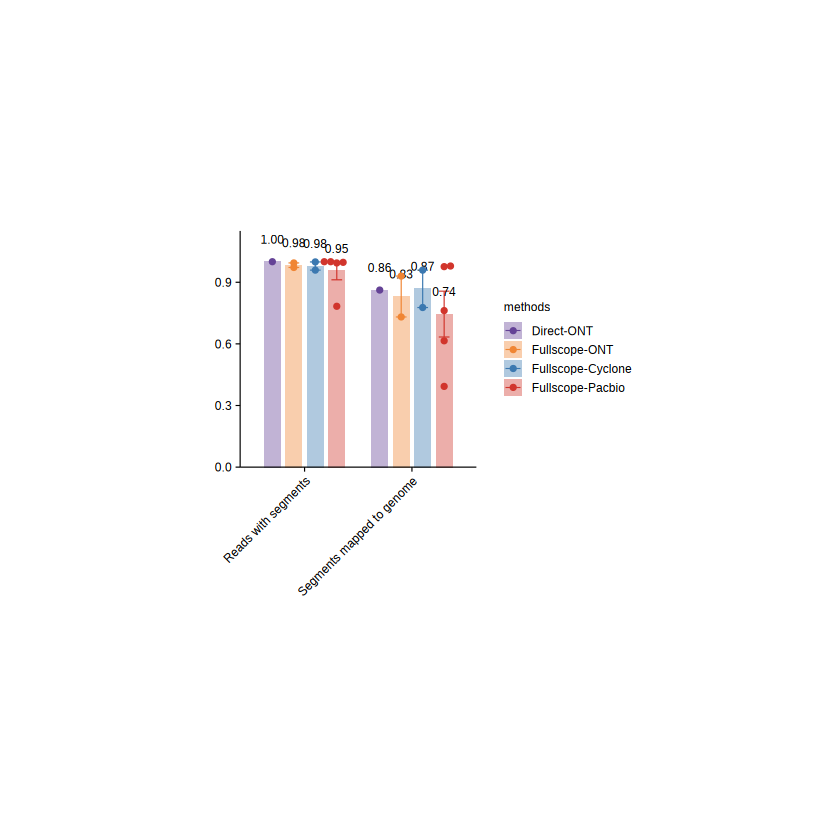

In [44]:
segst$process = factor(segst$process,
                           levels = c("Raw data","Reads with segments","Segments mapped to genome"))
segst$methods = factor(segst$methods,levels = c("Direct-ONT","Fullscope-ONT","Fullscope-Cyclone","Fullscope-Pacbio"))
# segst
library(tidyplots)
segst$prop = round(segst$ratio,3)
p1b = segst[segst$process != "Raw data",] |> 
  tidyplot(x = process, y = prop,color = methods) |> 
  add_mean_bar(alpha = 0.4) |> 
  add_sem_errorbar() |> 
  add_mean_value(color = "black",accuracy = 0.01,vjust = -2) |>
  add_data_points_beeswarm() |> 
  adjust_colors(new_colors = c("#644296","#F08533","#3B78B0", "#D1352C")) |>
  adjust_x_axis(title = "",rotate_labels = 45) |> adjust_y_axis(title = "")
library(ggpubr)
p1b
ggexport(p1b, filename = "result/figure1/f1_segmentation_rate_total_25_12_24.pdf",
         width = 5,height = 4)

In [ ]:
statdf = read.csv("result/figure1/read_stat_total_forplot_25_12_11.csv")
statdf[statdf$group != "Direct-ONT",] %>% group_by(process) %>% summarise(mean(prop))
statdf[statdf$group != "Direct-ONT",] %>% group_by(process,group) %>% summarise(mean(prop))
statdf[statdf$group  %in% c("Fullscope-ONT","Fullscope-Cyclone	"),] %>% group_by(process) %>% summarise(mean(prop))

process,mean(prop)
<chr>,<dbl>
CID in whitelist,0.6011964
Reads/segments with CID,0.8969899


`summarise()` has grouped output by 'process'. You can override using the
`.groups` argument.


process,group,mean(prop)
<chr>,<chr>,<dbl>
CID in whitelist,Fullscope-Cyclone,0.3290000
CID in whitelist,Fullscope-ONT,0.3070000
CID in whitelist,Fullscope-Pacbio,0.8277535
Reads/segments with CID,Fullscope-Cyclone,0.8845000
Reads/segments with CID,Fullscope-ONT,0.8215000
Reads/segments with CID,Fullscope-Pacbio,0.9321818


process,mean(prop)
<chr>,<dbl>
CID in whitelist,0.3070
Reads/segments with CID,0.8215


file saved to result/figure1//f1b_cid_mapped_rate_total_25_12_11.pdf



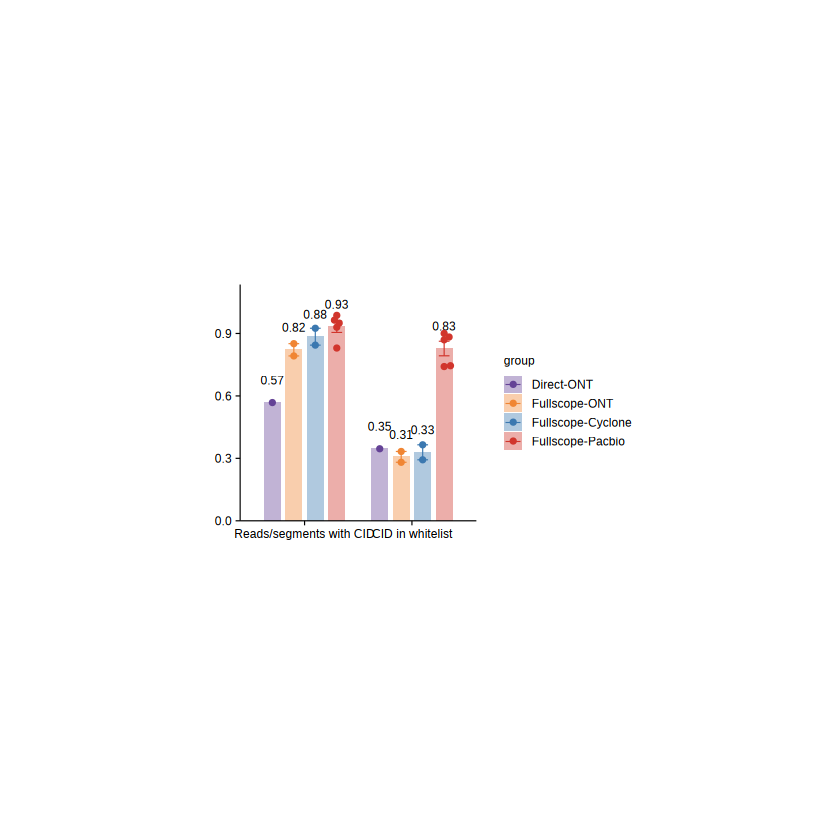

In [27]:
library(tidyplots)
p1b = statdf |> 
  tidyplot(x = process, y = prop,color = group) |> 
  add_mean_bar(alpha = 0.4) |> 
  add_sem_errorbar() |> 
  add_mean_value(color = "black",accuracy = 0.01,vjust = -2) |>
  add_data_points_beeswarm() |> 
  adjust_colors(new_colors = c("#644296","#F08533","#3B78B0", "#D1352C")) |>
  adjust_x_axis(title = "") |> adjust_y_axis(title = "")
library(ggpubr)
p1b
ggexport(p1b, filename = "result/figure1//f1b_cid_mapped_rate_total_25_12_11.pdf",
         width = 5,height = 4)

## ONT/Pacbio/Cyclone technical replicates compare

#### load data

In [46]:
#load data
read.pcb = qread(file = "data/reads_full_anotation/read_total_annotation_pacbio_24_03_22.qs")
read.ontd = qread(file = "data/reads_full_anotation/read_total_annotation_ontdirect_24_08_22.qs")
cidmap.ontf = qread("/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/nano_revo_process/ont_revo_cidmap_5er_filter_dedup_24_07_12.qs")
cidmap.cyclf = qread("/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/cyclone_revo_process/cyclone_revo_cidmap_5er_filter_dedup_24_07_12.qs")
head(cidmap.ontf)
head(read.pcb)

readid,querySeq,cidPos,targetSeq,editDi,gene,strand,time,kmtime,kmsize,threshold
<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<int>,<dbl>
00000002-74f0-4aac-b5f1-5300962f10fd-13;st_ed:A:7786-8469;AD:A:adapterM-adapterN;AP:A:Correct_640-664:+,GACCTTCAGCCAGTGTCTCCCTACA,26017_83373,GACCTTCAGCCAGTGTCTCCCTACA,0,PYCRL,*,0.000020,0.000000,0,7.0
00000002-74f0-4aac-b5f1-5300962f10fd-14;st_ed:A:8486-8974;AD:A:adapterN-end;AP:A:Boundary_389-413:+,TACGGATCATGCACTCCCTCTGTTG,25302_83379,TACGGATCATGCACTCCCTCTGTTG,0,LOC102134927,*,0.000066,0.000000,0,6.0
00000021-08aa-4c75-87b5-a7aac851b6a9-4;st_ed:A:1043-1539;AD:A:adapterO.rc-adapterN.rc;AP:A:Correct_22-48:-,AGTGATTGCGCATTCATCTAAAACCGC,43506_67976,TGATTGCGCATTAGTCTAAAACCGC,4,OSBP2,*,0.000289,0.000212,18,6.0
00000033-e8ce-4144-8ded-93a772582329-14;st_ed:A:10616-11399;AD:A:adapterJ-adapterK;AP:A:Correct_739-763:+,GCCAGTGATTTTCACGGCTTAATGT,19690_62662,GCCAGTGATTTTCACGGCTGAATGT,1,NUCKS1,*,0.002880,0.000619,157,5.0
00000033-e8ce-4144-8ded-93a772582329-3;st_ed:A:1542-1993;AD:A:adapterD-adapterE;AP:A:Correct_413-432:+,AGGTAAGTGCTTGCATACAG,7970_88627,AGGTAAGTGCTTGCATACAGTTGTC,5,MLLT3,*,0.000679,0.000176,21,6.0
00000033-e8ce-4144-8ded-93a772582329-5;st_ed:A:2418-2962;AD:A:adapterF-adapterG;AP:A:Correct_502-525:+,ACGGGCATGGAACTCCTTTCCAGT,35389_31143,ACGGGGCATGGAACTCCTTTCCAGT,1,LOC107128653,*,0.165010,0.138090,5239,3.9


readid,cid,x,y,rx,ry,cell_label,gene_area,origin_name,global_region_id,⋯,cell_type,subclass,class,layer,area,lobe,tranid,type,transcript_id,gene_id
<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>
m84075_240302_105507_s3/100007988/ccs/3438_3659,CB:Z:31666_36496,31666,36496,34948,23572,0,902,L-PE-l3,902,⋯,,,,l3,PE,parietal,60842,compatible,XM_005570639.2,SLC38A2
m84075_240302_105507_s3/100007990/ccs/1411_2171,CB:Z:46140_87419,46140,87419,21812,74856,0,1176,L-TEpd-l6,1176,⋯,,,,l6,TEpd,temporal,89857,equal,XM_015444245.1,SSR4
m84075_240302_105507_s3/100007990/ccs/455_826,CB:Z:20631_67296,20631,67296,46785,54072,749426,1448,L-lv-v,1448,⋯,,,,v,lv,NA,44034,compatible,XM_005541646.2,PBXIP1
m84075_240302_105507_s3/100007990/ccs/455_826,CB:Z:20631_67296,20631,67296,46785,54072,749426,1448,L-lv-v,1448,⋯,,,,v,lv,NA,44035,compatible,XM_005541647.2,PBXIP1
m84075_240302_105507_s3/100007990/ccs/455_826,CB:Z:20631_67296,20631,67296,46785,54072,749426,1448,L-lv-v,1448,⋯,,,,v,lv,NA,44036,compatible,XM_005541648.2,PBXIP1
m84075_240302_105507_s3/100007990/ccs/455_826,CB:Z:20631_67296,20631,67296,46785,54072,749426,1448,L-lv-v,1448,⋯,,,,v,lv,NA,102143,compatible,XM_015456531.1,PBXIP1


In [50]:
read.pcb = unique(read.pcb$readid)
read.ontd = unique(read.ontd$readid)
cidmap.ontf = unique(cidmap.ontf$readid)
cidmap.cyclf = unique(cidmap.cyclf$readid)
readgroup = list("pacbio" = read.pcb,"ontd" = read.ontd,"ontf" = cidmap.ontf,"cycf" = cidmap.cyclf)
qsave(readgroup,file = "data/reads_full_anotation/read_id_group_25_10_20.qs")

In [56]:
readgroupdf = NULL
for(i in 1:length(readgroup)){
    readgroupdf = rbind(readgroupdf,data.frame("readid" = readgroup[[i]],"sample" = names(readgroup)[i]))
}
head(readgroupdf)
nrow(readgroupdf)

,readid,sample
,<chr>,<chr>
1,m84075_240302_105507_s3/100007988/ccs/3438_3659,pacbio
2,m84075_240302_105507_s3/100007990/ccs/1411_2171,pacbio
3,m84075_240302_105507_s3/100007990/ccs/455_826,pacbio
4,m84075_240302_105507_s3/100007994/ccs/5387_5827,pacbio
5,m84075_240302_105507_s3/100007999/ccs/52_427,pacbio
6,m84075_240302_105507_s3/100008000/ccs/2463_2701,pacbio


[1] 203466585

#### spatial density

In [81]:
#spatial density
#bin200 stat
ra = 100
fsraw.cor$xid = as.integer(fsraw.cor$x/(ra*2)) * ra * 2 + ra
fsraw.cor$yid = as.integer(fsraw.cor$y/(ra*2)) * ra * 2 + ra
fsraw.cor$blockid = paste0(fsraw.cor$xid,"_",fsraw.cor$yid)
binst = fsraw.cor %>% group_by(group,blockid) %>% summarise(count = length(unique(readid)))
qsave(binst,"data/fullscope_qc/sample_platform_binstat_bin100_25_10_20.qs")
head(binst)

`summarise()` has grouped output by 'group'. You can override using the
`.groups` argument.


group,blockid,count
<chr>,<chr>,<int>
cycf,10050_26350,63
cycf,10050_26450,79
cycf,10050_26550,68
cycf,10050_26650,87
cycf,10050_26750,96
cycf,10050_26850,202


In [30]:
binst = qread("data/fullscope_qc/sample_platform_binstat_bin50_25_10_20.qs")
ra = 100
binst$x = as.numeric(MySplit(binst$blockid,"_",1))
binst$y = as.numeric(MySplit(binst$blockid,"_",2))
binst$xid = as.integer(binst$x/(ra*2)) * ra * 2 + ra
binst$yid = as.integer(binst$y/(ra*2)) * ra * 2 + ra
binst$blockid = paste0(binst$xid,"_",binst$yid)
binst = binst %>% group_by(group,blockid) %>% summarise(count = sum(count))
head(binst)

`summarise()` has grouped output by 'group'. You can override using the
`.groups` argument.


group,blockid,count
<chr>,<chr>,<int>
cycf,10100_26300,123
cycf,10100_26500,270
cycf,10100_26700,489
cycf,10100_26900,734
cycf,10100_27100,666
cycf,10100_27300,629


In [37]:
# binst = qread("data/fullscope_qc/sample_platform_binstat_25_10_20.qs")
binst = binst %>% group_by(group) %>% mutate(norm = scale(count))
binst$log = log10(binst$count)
#binst = read.csv("result/figure_revision/technical_compare_bin_density.csv")
head(binst)
binstl = dcast(binst,blockid~group,value.var = "log")
head(binstl)
colnames(binstl) = c("blockid","FS.Cyclone","Direct.ONT","FS.ONT","FS.Pacbio")
library(GGally)
binstl = binstl[,c("blockid","FS.Cyclone","FS.ONT","FS.Pacbio","Direct.ONT")]

group,blockid,count,norm,log
<chr>,<chr>,<int>,"<dbl[,1]>",<dbl>
cycf,10100_26300,123,-1.1542878,2.089905
cycf,10100_26500,270,-0.3711905,2.431364
cycf,10100_26700,489,0.7954647,2.689309
cycf,10100_26900,734,2.1006269,2.865696
cycf,10100_27100,666,1.7383778,2.823474
cycf,10100_27300,629,1.5412717,2.798651


,blockid,cycf,ontd,ontf,pacbio
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,10100_26300,2.089905,2.136721,2.296665,1.838849
2,10100_26500,2.431364,2.450249,2.674861,2.255273
3,10100_26700,2.689309,2.691081,2.881385,2.460898
4,10100_26900,2.865696,2.881385,3.100715,2.640481
5,10100_27100,2.823474,2.826075,3.031812,2.598791
6,10100_27300,2.798651,2.773786,3.042576,2.593286


Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
"Removed 11705 rows containing missing values"
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
"Removed 11705 rows containing missing values"
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
"Removed 11684 rows containing missing values"
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
"Removed 11705 rows containing missing values"
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
"Removed 11684 rows containing missing values"
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
"Removed 11684 rows containing missing values"
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for 

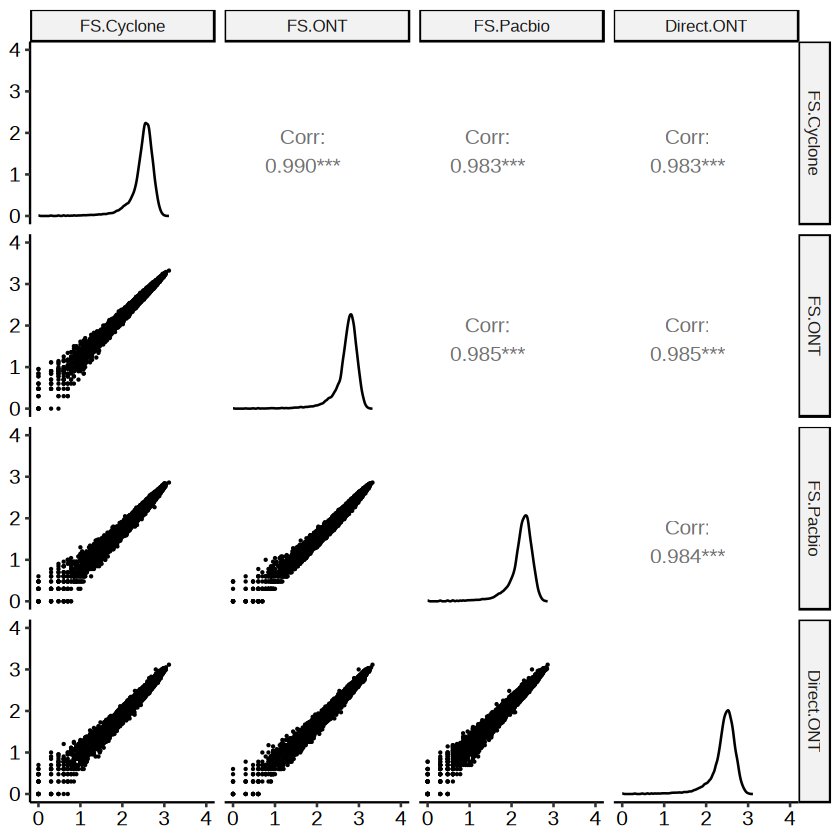

In [53]:
p1.1 = ggpairs(binstf[, c(2:5)],  
        upper = list(continuous = wrap("cor", method = "pearson")),
        lower = list(continuous = wrap("points",size = 0.1))) + 
        xlim(c(0,4)) + ylim(c(0,4)) + 
        theme_pubr()
p1.1
ggexport(p1.1,filename = "result/figure_revision/technical_compare_bin100_density_figure.pdf",width = 5,height = 4)
write.csv(binstf,file = "result/figure_revision/technical_compare_bin100_density.csv",quote = FALSE,row.names = F)

In [136]:
#isoform expression
transt = fsraw.cor %>% group_by(group,transcript_id) %>% summarise(count = length(unique(readid)))
transt = transt %>% group_by(group) %>% mutate(norm = scale(count))

`summarise()` has grouped output by 'group'. You can override using the
`.groups` argument.


Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
"Removed 3890 rows containing missing values"
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
"Removed 9374 rows containing missing values"
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
"Removed 9023 rows containing missing values"
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
"Removed 8535 rows containing missing values"
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
"Removed 7859 rows containing missing values"
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
"Removed 9302 rows containing missing values"
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is a

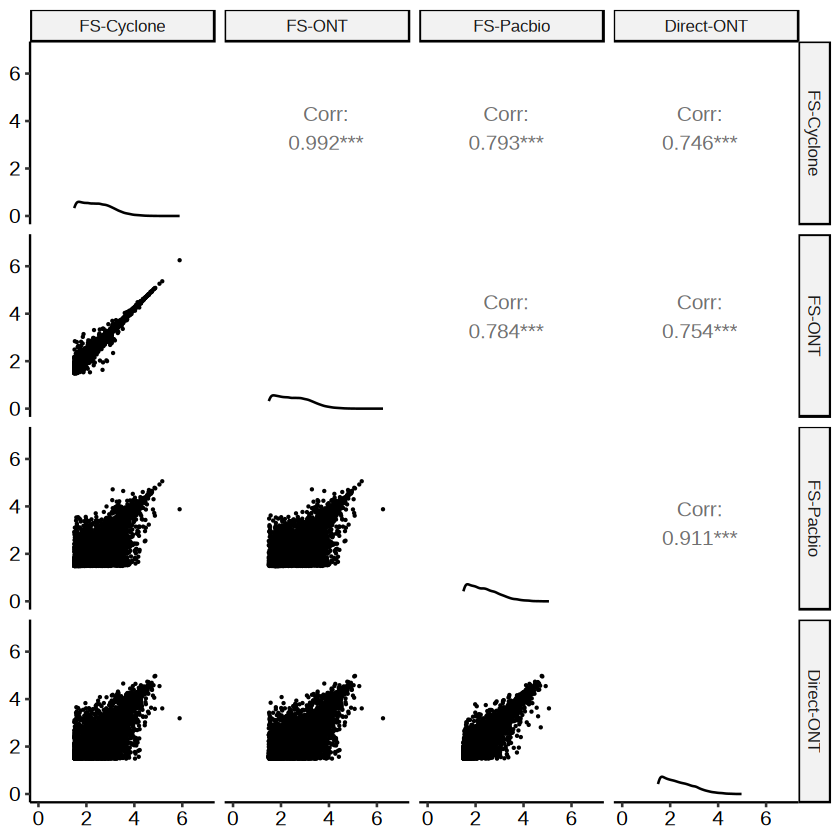

In [137]:
transt$log = log10(transt$count)
transtl = dcast(transt[transt$count>30,],transcript_id~group,value.var = "log")
colnames(transtl) = c("transcript_id","FS-Cyclone","Direct-ONT","FS-ONT","FS-Pacbio")
transtl = transtl[,c("transcript_id","FS-Cyclone","FS-ONT","FS-Pacbio","Direct-ONT")]
p1.2 = ggpairs(transtl[, c(2:5)],  
        upper = list(continuous = wrap("cor", method = "pearson")),
        lower = list(continuous = wrap("points",size = 0.1))) + 
        xlim(c(0,7)) + ylim(c(0,7)) + 
        theme_pubr()
p1.2
ggexport(p1.2,filename = "result/figure_revision/technical_compare_transcript_density_figure.pdf",width = 5,height = 4)
write.csv(transtl,file = "result/figure_revision/technical_compare_transcript_density.csv",quote = FALSE,row.names = F)

Warning message:
"Removed 3 rows containing non-finite outside the scale range
(`stat_pointdensity()`)."
Warning message:
"Removed 3 rows containing non-finite outside the scale range
(`stat_pointdensity()`)."
file saved to result/figure_revision/technical_compare_transcript_density_withn_nighbor_figure_25_11_24.pdf



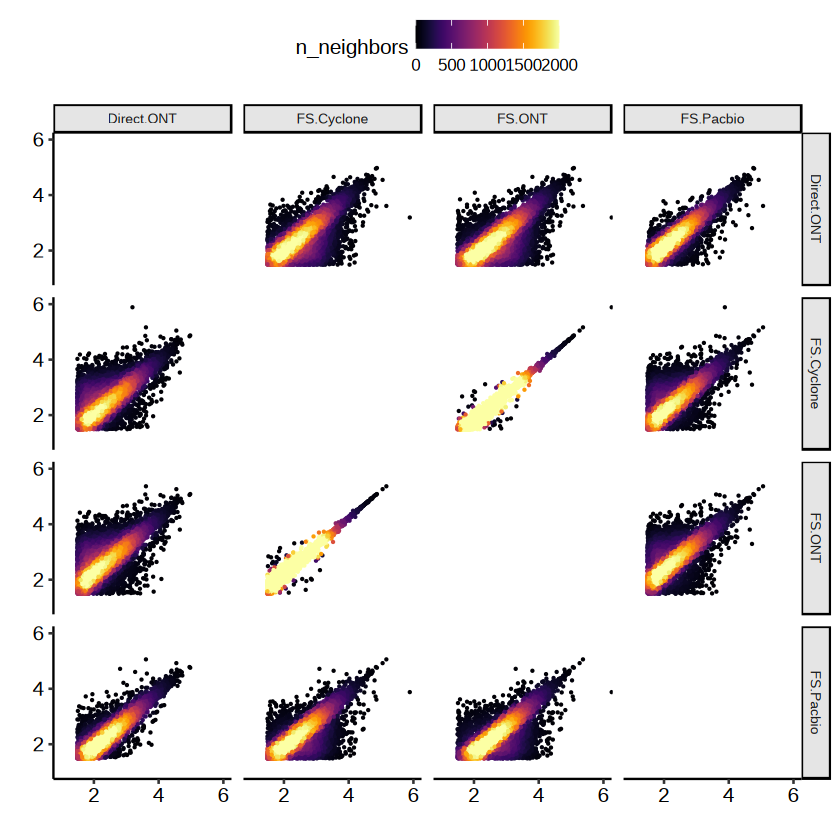

In [ ]:

library(tidyr)
long_data <- transtl %>%
  pivot_longer(
    cols = c(FS.Cyclone, FS.ONT, FS.Pacbio, Direct.ONT),
    names_to = "variable", 
    values_to = "value"
  ) %>%
  filter(!is.na(value))  


var_pairs <- expand.grid(
  x_var = unique(long_data$variable),
  y_var = unique(long_data$variable),
  stringsAsFactors = FALSE
)


plot_data <- var_pairs %>%
  left_join(long_data, by = c("x_var" = "variable")) %>%
  rename(x_value = value) %>%
  left_join(long_data, by = c("y_var" = "variable", "transcript_id" = "transcript_id")) %>%
  rename(y_value = value) %>%
  filter(!is.na(x_value), !is.na(y_value)) 




library(ggpointdensity)
p <- ggplot(plot_data[plot_data$x_var != plot_data$y_var,], aes(x = x_value, y = y_value)) +
  geom_pointdensity(size = 0.1) +
  scale_color_viridis(option = "B",
    limits = c(0, 2000),
    oob = scales::squish) +
 # scale_color_gradient2(low = "#440D54",mid = "#20A386",high = "#FDE725",midpoint = 1000) +
  facet_grid(y_var ~ x_var, scales = "free") + 
  labs(x = "", y = "") +
  theme_pubr() +
  theme(
    panel.spacing = unit(0.5, "lines"),
    strip.background = element_rect(fill = "grey90"),
    strip.text = element_text(size = 8)
  ) + xlim(1, 6) +
    ylim(1, 6)
p
ggexport(p,filename = "result/figure_revision/technical_compare_transcript_density_withn_nighbor_figure_25_11_24.pdf",width = 5,height = 5)


## F1E-F.Spatial coverage compare between ngs and long reads

#### reads density compare

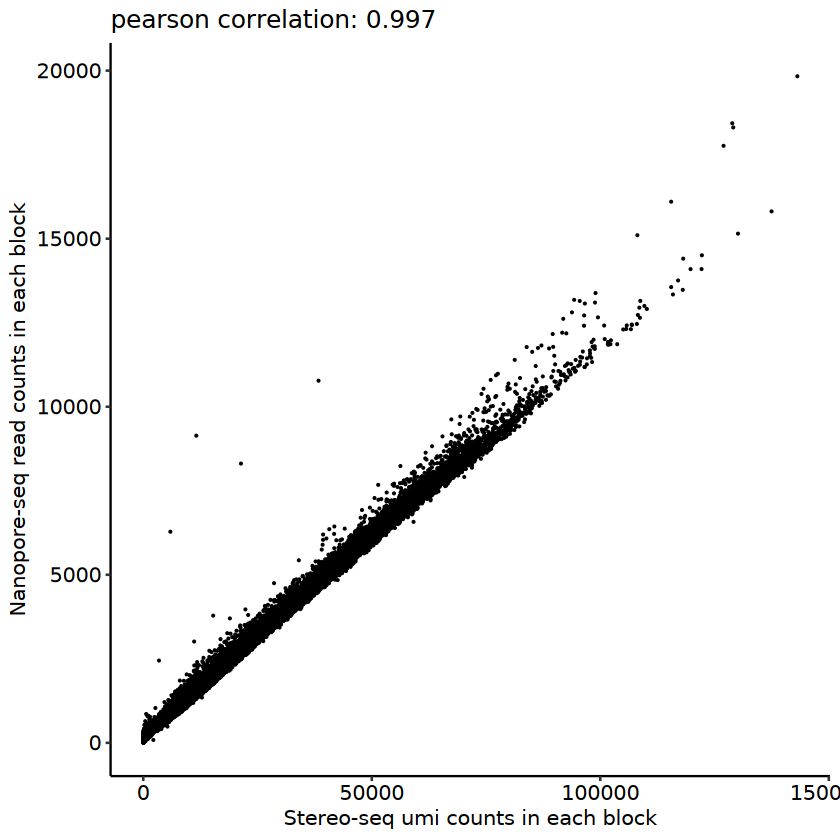

In [8]:
geneblmx = qread(file = "result/figure1/block_readsnum_coverage_cor_08_20.qs")
geneblmx$x = as.numeric(MySplit(geneblmx$blockid,"_",1))
geneblmx$y = as.numeric(MySplit(geneblmx$blockid,"_",2))
geneblmx2 = geneblmx
ra = 100
geneblmx2$xid = as.integer(geneblmx2$x/(ra*2)) * ra * 2 + ra
geneblmx2$yid = as.integer(geneblmx2$y/(ra*2)) * ra * 2 + ra
geneblmx2$blockid = paste0(geneblmx2$xid,"_",geneblmx2$yid)
geneblmx2 = geneblmx2 %>% group_by(blockid) %>% summarise(ngs = sum(ngs),nano = sum(nano))
geneblmx2$x = as.numeric(MySplit(geneblmx2$blockid,"_",1))
geneblmx2$y = as.numeric(MySplit(geneblmx2$blockid,"_",2))
gcor = cor(geneblmx2$nano,geneblmx2$ngs)
p1d = ggplot(geneblmx2,aes(x = ngs, y = nano)) +
    geom_point(size = 0.1) +
    #geom_smooth() +
    xlab("Stereo-seq umi counts in each block") +
    ylab("Nanopore-seq read counts in each block") +
    ggtitle(paste0("pearson correlation: ",round(gcor,3))) +
    theme_pubr()
p1d 
ggsave(p1d,filename = "result/figure1/block_readsnum_coverage_cor_bin100_08_20.pdf",units = "in",
         width = 5,height = 4)

Using blockid as id variables

Warning message:
"attributes are not identical across measure variables; they will be dropped"
Warning message:
"The `panel.margin` argument of `theme()` is deprecated as of ggplot2 2.2.0.
ℹ Please use the `panel.spacing` argument instead."


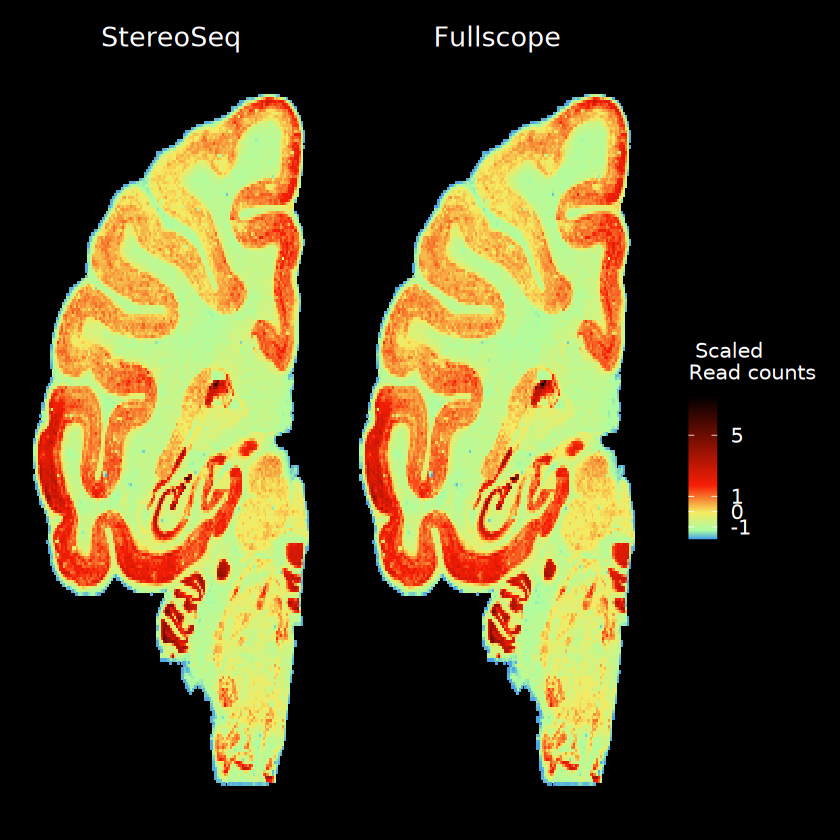

In [51]:
 MySplit = function(str,sep, n){
    return(unlist(lapply(strsplit(str,sep),"[[",n)))
  }
  geneblmx2$x = as.numeric(MySplit(geneblmx2$blockid,"_",1))
  geneblmx2$y = as.numeric(MySplit(geneblmx2$blockid,"_",2))
  # pref = qread("processed/spatial_basic_plot/area_figure_an.qs")
  
  geneblmx2$StereoSeq = scale(geneblmx2$ngs)
  geneblmx2$Fullscope = scale(geneblmx2$nano)
  geneblmxt = melt(geneblmx2[c("blockid","StereoSeq","Fullscope")])
  geneblmxt$x = as.numeric(MySplit(geneblmxt$blockid,"_",1))
  geneblmxt$y = as.numeric(MySplit(geneblmxt$blockid,"_",2))
  qsave(geneblmxt,file = "result/figure1/block_readsnum_stat_05_28.qs")
  
  cols1 <- colorRampPalette(c("#45a0ea", "#adfda2"))
  cols2 <- colorRampPalette(c( "#adfda2","#f7ea60"))
  cols3 <- colorRampPalette(c( "#f7ea60","#f71e06"))
  cols4 <- colorRampPalette(c( "#f71e06","black"))
  cols = c(cols1(20),cols2(40),cols3(60),cols4(200))

  
  p1c = ggplot() +
    geom_tile(data = geneblmxt,
              aes(x,y,fill = value)) +
    # geom_segment(data = precf$areaedges, aes(x = x1, y = y1, xend = x2, yend = y2),
    #              size = 0.5,color = "black") + 
    # scale_fill_viridis() +
    scale_fill_gradientn(colors = cols,breaks = c(-1,0,1,5)) +
    facet_grid(~variable)+ labs(fill = " Scaled\nRead counts") +
    # theme_void() + theme(panel.background = element_rect(fill = "black")) +
    theme_presentation() + 
    scale_y_reverse() + scale_x_reverse()
  p1c
  ggsave(p1c,filename = "result/figure1/f1c.block_readsnum_scaled_tile_cmp_bin200_8_21.pdf",units = "in",
         width = 10,height = 7)

## Spatial annotation

In [7]:
 #isoform number stat
genest = fsraw.cor %>% group_by(gene_id) %>% summarise(readnum = length(unique(readid)))
genest = genest[order(genest$readnum,decreasing = T),]
  #total basic number stat
isoformst = fsraw.cor[fsraw.cor$gene_id %in% genest[genest$readnum > 100,
                                                     ]$gene_id,] %>% 
    group_by(gene_id) %>% 
    summarise(trannum = length(unique(transcript_id)))
  
  

file saved to result/figure1/bam_iso_basic_stat1_isoform_number_gene_100read_25_10_10.pdf



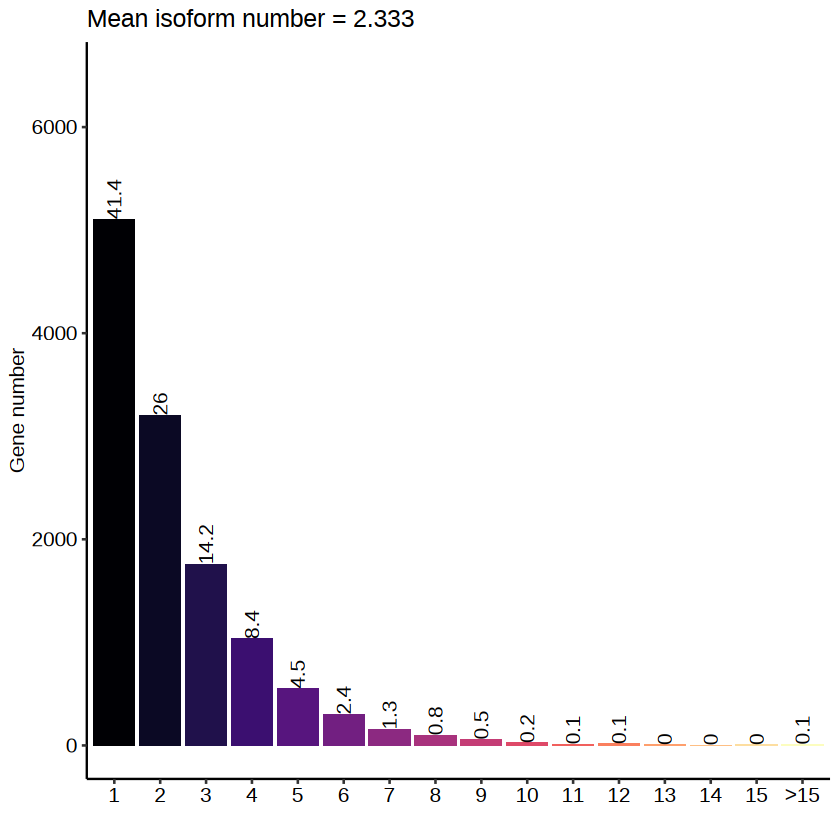

In [9]:
mtransnum = mean(isoformst$trannum)
isoformst1 = as.data.frame(table(isoformst$trannum))

isoformst1$prop = isoformst1$Freq/sum(isoformst1$Freq)
isoformst1f = isoformst1[as.numeric(isoformst1$Var1) <= 15,]
isoformst1f2 = isoformst1[as.numeric(isoformst1$Var1) > 15,]
isoformst1 = rbind(isoformst1f,data.frame("Var1" = ">15",
                                            "Freq" = sum(isoformst1f2$Freq),
                                            "prop" = sum(isoformst1f2$prop)))
isoformst1$prop = round(isoformst1$prop,3)*100
  
  pis1 = ggplot(isoformst1,aes(x = Var1,y = Freq,fill = Var1)) + 
    geom_bar(stat = "identity") +
    scale_y_continuous(limits = c(0,6500)) +
    geom_text(aes(label = prop),hjust = 0,angle = 90) +
    ggtitle(paste0("Mean isoform number = ", round(mtransnum,3))) +
    scale_fill_viridis(discrete = T,option = "A")+ xlab("") + 
    ylab("Gene number") +
    theme_pubr() +theme(legend.position = "none")
  pis1
  ggexport(pis1,filename = "result/figure1/bam_iso_basic_stat1_isoform_number_gene_100read_25_10_10.pdf",
           width = 5,height = 4)

## Transcript count

In [140]:
#build data
Buildtransls = function(fsraw.cor){
    transtls = list()
    FullLengthTranSt = function(fs.info){
      transtl = fs.info %>% group_by(gene_id, areatr) %>% 
        mutate(genecount = length(unique(readid))) %>% 
        group_by(gene_id,transcript_id,areatr) %>% 
        summarise(count = length(unique(readid)),
                  genecount = unique(genecount))
      transtl = transtl[transtl$areatr != "" &
                          !is.na(transtl$areatr),]
      return(transtl)
    }
    
    #layer
    # npclf = npclf[npclf$arealayer %in% paste0("l",1:6),]
    fs.info.cortex = fsraw.cor[fsraw.cor$layer %in% paste0("l",1:6),]
    fs.info.cortex$areatr = fs.info.cortex$layer
    transtls$layer = FullLengthTranSt(fs.info.cortex)
    
    #region
    fs.info.cortex$areatr = fs.info.cortex$region
    transtls$region = FullLengthTranSt(fs.info.cortex)
    
    #lobe
    fs.info.cortex$areatr = fs.info.cortex$lobe
    transtls$lobe = FullLengthTranSt(fs.info.cortex)
    
    #subclass
    fs.info.cortex$areatr = fs.info.cortex$subclass
    transtls$subclass = FullLengthTranSt(fs.info.cortex)
    
    #class
    fs.info.cortex$areatr = fs.info.cortex$class
    transtls$class = FullLengthTranSt(fs.info.cortex)
    
    #class
    fsraw.cor$areatr = fsraw.cor$subcortical
    transtls$subcortical = FullLengthTranSt(fsraw.cor)
    return(transtls)
}

transls.ontd = Buildtransls(fsraw.cor[fsraw.cor$group == "ontd",])
transls.ontf = Buildtransls(fsraw.cor[fsraw.cor$group == "ontf",])
transls.cycf = Buildtransls(fsraw.cor[fsraw.cor$group == "cycf",])
transls.pacb = Buildtransls(fsraw.cor[fsraw.cor$group == "pacbio",])
# qsave(transtls,"data/reads_full_anotation/read_trans_stat_list_dedup_fsrawcor_25_10_10.qs")


`summarise()` has grouped output by 'gene_id', 'transcript_id'. You can
override using the `.groups` argument.
`summarise()` has grouped output by 'gene_id', 'transcript_id'. You can
override using the `.groups` argument.
`summarise()` has grouped output by 'gene_id', 'transcript_id'. You can
override using the `.groups` argument.
`summarise()` has grouped output by 'gene_id', 'transcript_id'. You can
override using the `.groups` argument.
`summarise()` has grouped output by 'gene_id', 'transcript_id'. You can
override using the `.groups` argument.
`summarise()` has grouped output by 'gene_id', 'transcript_id'. You can
override using the `.groups` argument.
`summarise()` has grouped output by 'gene_id', 'transcript_id'. You can
override using the `.groups` argument.
`summarise()` has grouped output by 'gene_id', 'transcript_id'. You can
override using the `.groups` argument.
`summarise()` has grouped output by 'gene_id', 'transcript_id'. You can
override using the `.groups` argument.
`

In [ ]:
fs.info.cortex = fsrawf[fsrawf$class != "",]
fsrawdp.cor$areatr = paste0(fsrawdp.cor$lobe,"-",fsrawdp.cor$subclass)
transtsb = FullLengthTranSt(fsrawdp.cor)

### DTU calculation

In [10]:
#transtls = qread("data/reads_full_anotation/read_trans_stat_list_dedup_fsrawcor_24_09_04.qs")

In [151]:
#chi test
#transt = transtls$layer
CalSigIsoform = function(transt){
    transt = transt[!is.na(transt$areatr),]
    transt = transt[transt$areatr != "",]
    transt$relative = transt$count/transt$genecount
    #transtf = transt[transt$count > 5,]
    transtf = transt[transt$genecount > 20,]
    transtf = transtf %>% group_by(transcript_id) %>% 
      mutate(meanrelative = mean(relative),
             otherrelative = (sum(relative) - relative)/(n() - 1))
    transtf = transtf[which(transtf$meanrelative > 0.05),]

    arean = length(unique(transtf$areatr))

    #areanth = arean*(1/3)
   # print(areanth)
    transtf = transtf %>% group_by(transcript_id) %>% 
       filter(length(unique(areatr)) > 1)
    transtf = transtf %>% group_by(gene_id) %>% 
      filter(length(unique(transcript_id))>1)
    
    # transtf$lfc = log2(transtf$relative/transtf$meanrelative)
    transtf$dr = transtf$relative - transtf$otherrelative
    transtf$sig = "N"
    table(transtf$sig)
    
    #transtf$pvalue = 1
    MyChiqTest = function(transcript_id, areatr, count){
      dat = data.frame(transcript_id = transcript_id, areatr = areatr,
                       count = count)
      dat = dcast(dat, areatr~transcript_id,
                  value.var = "count",
                  fun.aggregate = sum)
      rownames(dat) = dat$areatr;dat = dat[-1]
      p = tryCatch(chisq.test(as.matrix(dat))$p.value, 
                   error = function(e) NA)
      return(p)
    }
    transtf <- transtf %>% filter(!is.na(transcript_id), !is.na(areatr), !is.na(count))
    if(nrow(transtf) == 0) return(transtf)
    pvdf = transtf %>% group_by(gene_id) %>% summarise(pvalue = MyChiqTest(transcript_id, areatr, count))
    pvdf$padj = p.adjust(pvdf$pvalue,method = "BH")
    transtf = merge(transtf,pvdf,by = "gene_id")
    #print(head(transtf))
    # table(transtf[transtf$padj < 0.05,]$sig)
    #transtf[transtf$padj < 0.05,]$sig = "Y"
    transtf[which(transtf$dr > 0.1 & transtf$padj < 0.05 & transtf$count > 10), "sig"] = "Up"
    transtf[which(transtf$dr < -0.1 & transtf$padj < 0.05 & transtf$count > 10), "sig"] = "Down"
    return(transtf)
}
CalSigIsoformls = function(transtls){
    isosigls = list()
    for (i in 1:length(transtls)) {
        isosigls[[i]] = CalSigIsoform(transtls[[i]])
    }
    names(isosigls) = names(transtls)
    return(isosigls)
}
isosigls.ontd = CalSigIsoformls(transls.ontd)
isosigls.ontf = CalSigIsoformls(transls.ontf)
isosigls.pacb = CalSigIsoformls(transls.pacb)
isosigls.cycf = CalSigIsoformls(transls.cycf)
# names(isosigls) = names(transtls)
# for (i in 1:length(isosigls)) {
#     print(length(unique(isosigls[[i]][isosigls[[i]]$sig!="N",]$gene_id)))
# }
# qsave(isosigls,file = "data/dtu_analysis/dtu_isoform_ls_fsraw_cor_25_10_10.qs")

Warning message:
"There were 1385 warnings in `summarise()`.
The first warning was:
ℹ In argument: `pvalue = MyChiqTest(transcript_id, areatr, count)`.
ℹ In group 3: `gene_id = "AAMP"`.
Caused by warning in `chisq.test()`:
! Chi-squared approximation may be incorrect
ℹ Run `dplyr::last_dplyr_warnings()` to see the 1384 remaining warnings."
Warning message:
"There were 1143 warnings in `summarise()`.
The first warning was:
ℹ In argument: `pvalue = MyChiqTest(transcript_id, areatr, count)`.
ℹ In group 1: `gene_id = "AACS"`.
Caused by warning in `chisq.test()`:
! Chi-squared approximation may be incorrect
ℹ Run `dplyr::last_dplyr_warnings()` to see the 1142 remaining warnings."
Warning message:
"There were 1297 warnings in `summarise()`.
The first warning was:
ℹ In argument: `pvalue = MyChiqTest(transcript_id, areatr, count)`.
ℹ In group 1: `gene_id = "AACS"`.
Caused by warning in `chisq.test()`:
! Chi-squared approximation may be incorrect
ℹ Run `dplyr::last_dplyr_warnings()` to see the 

In [152]:
names(isosigls.ontd)
#head(transls.ontd$subcortical)

[1] "layer"       "region"      "lobe"        "subclass"    "class"      
[6] "subcortical"

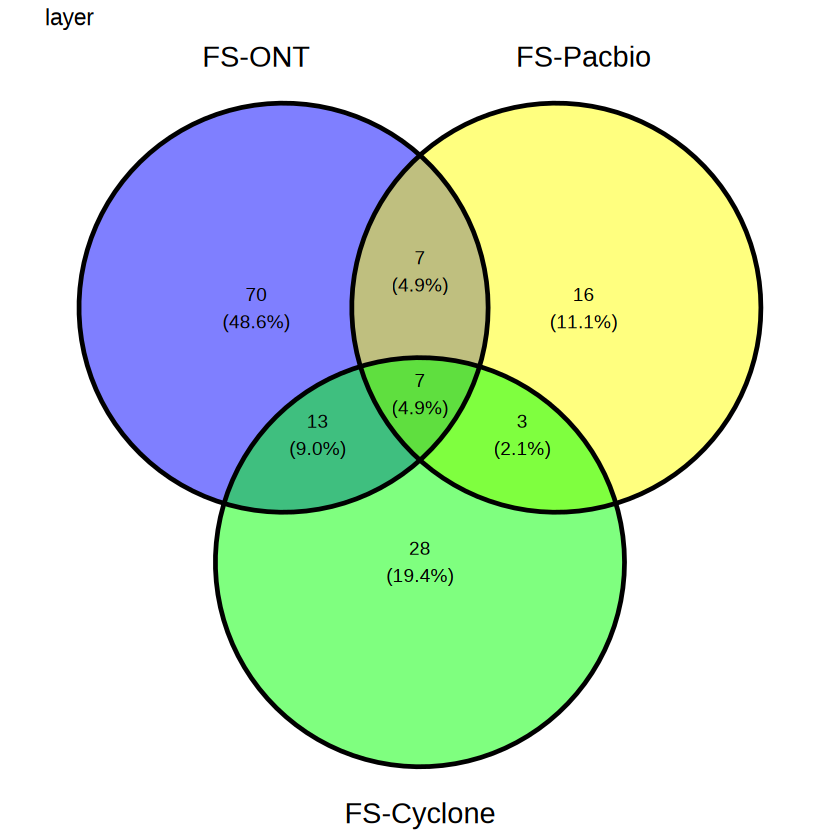

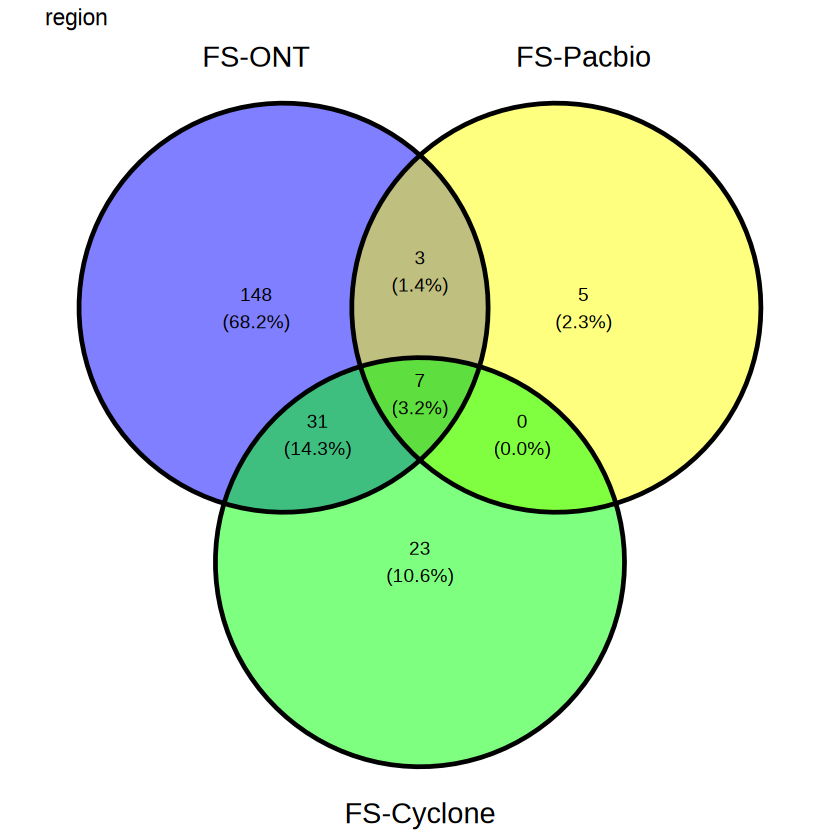

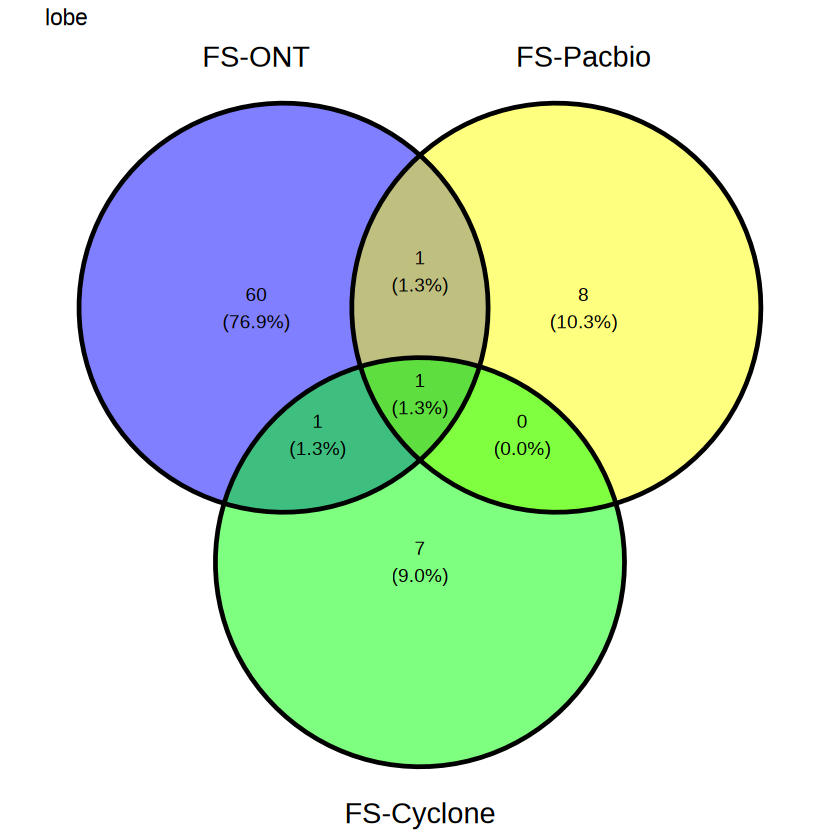

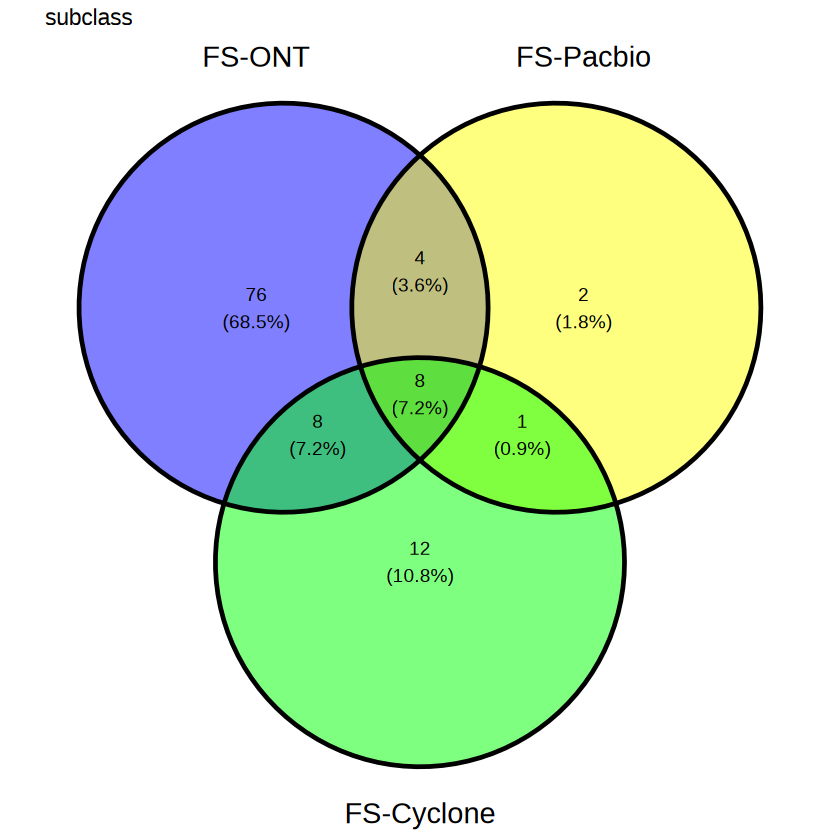

[[1]]

[[2]]

[[3]]

[[4]]

[[5]]

[[6]]


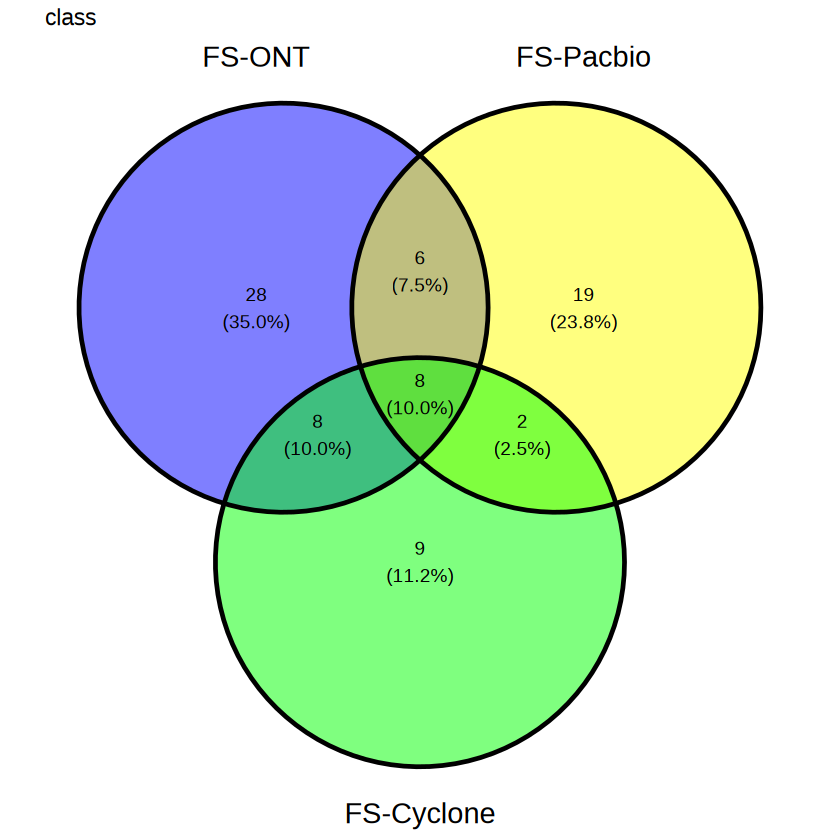

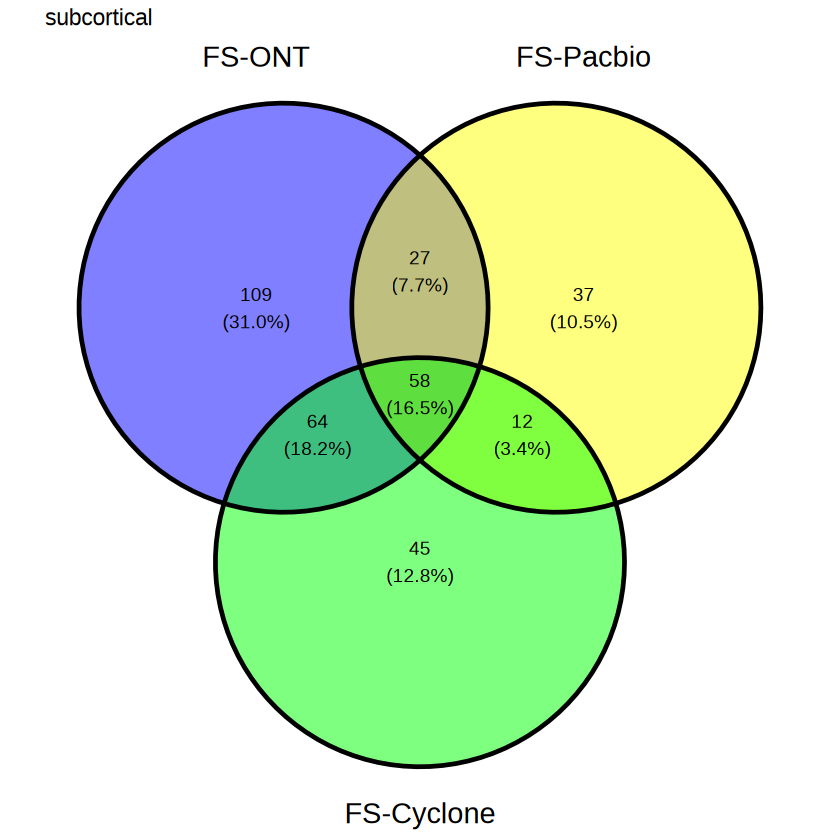

In [165]:
cmpls = list()
pls = list()
for(i in 1:length(isosigls.ontd)){
    #isoi.ontd = isosigls.ontd[[i]]
    isoi.ontf = isosigls.ontf[[i]]
    isoi.pacb = isosigls.pacb[[i]]
    isoi.cycf = isosigls.cycf[[i]]
    genels = list(
        #isoi.ontd$gene_id,
                  isoi.ontf$gene_id,isoi.pacb$gene_id,isoi.cycf$gene_id)
    commonid = Reduce(intersect,genels)
    if(length(commonid) == 0) next
    dtuls = list(
        #"Direct-ONT" = isoi.ontd[isoi.ontd$gene_id %in% commonid & isoi.ontd$sig != "N",]$gene_id,
                 "FS-ONT" = isoi.ontf[isoi.ontf$gene_id %in% commonid & isoi.ontf$sig != "N",]$gene_id,
                 "FS-Pacbio" = isoi.pacb[isoi.pacb$gene_id %in% commonid & isoi.pacb$sig != "N",]$gene_id,
                 "FS-Cyclone" = isoi.cycf[isoi.cycf$gene_id %in% commonid & isoi.cycf$sig != "N",]$gene_id)
    cmpls[[i]] = dtuls
    names(cmpls)[i] = names(isosigls.ontd)[i]
    library(ggvenn)
    pi = ggvenn(cmpls[[i]]) + ggtitle(names(isosigls.ontd)[i])
    pls[[i]] = pi
}
pls
#qsave(isosigls,file = "data/dtu_analysis/dtu_isoform_ls_fsraw_cor_24_09_04.qs")

In [50]:
# Reduce(intersect,cmpls$subcortical)
#try show integrated DTUs' isoform retio
isosigls = qread("data/dtu_analysis/dtu_isoform_ls_fsraw_cor_25_10_10.qs")

In [53]:
for(i in 1:6){
    isosigi = isosigls[[i]]
    isosigi = isosigi[isosigi$sig != "N",]
    print(paste0(names(isosigls)[i]," gene: ",length(unique(isosigi$gene_id)), " trans:",length(unique(isosigi$transcript_id))))
}

[1] "layer gene: 576 trans:981"
[1] "region gene: 1463 trans:2613"
[1] "lobe gene: 358 trans:627"
[1] "subclass gene: 1105 trans:1968"
[1] "class gene: 473 trans:837"
[1] "subcortical gene: 1445 trans:2559"


In [ ]:
isosigi.ly = isosigls$layer
isosigi.ly = isosigi.ly[isosigi.ly$sig != "N",]
isosigi.lb = isosigls$lobe
isosigi.lb = isosigi.lb[isosigi.lb$sig != "N",]
isosigi.rg = isosigls$region
isosigi.rg = isosigi.rg[isosigi.rg$sig != "N",]
length(intersect(isosigi.ly$gene_id,unique(c(isosigi.lb$gene_id,isosigi.rg$gene_id))))

In [216]:

Selectiso = function(isoi.ontd,isosigi,groupid,sampleid){
    isoi.ontd$sigid = paste0(isoi.ontd$transcript_id,"-",isoi.ontd$areatr)
    isoi.ontd$group = groupid
    isoi.ontd = isoi.ontd[isoi.ontd$sigid %in% isosigi$sigid,c("transcript_id","areatr","group","count","dr")]
    colnames(isoi.ontd)[4:5] = paste0(sampleid,colnames(isoi.ontd)[4:5])
    return(isoi.ontd)
}
isocmpt = NULL
for(i in 1:(length(isosigls) - 1)){
    isosigi = isosigls[[i]]
    isosigi = isosigi[isosigi$sig != "N",]
    isosigi$sigid = paste0(isosigi$transcript_id,"-",isosigi$areatr)
    isoi.ontf = Selectiso(isosigls.ontf[[i]],isosigi,names(isosigls)[i],"FS.ONT.")
    isoi.pacb = Selectiso(isosigls.pacb[[i]],isosigi,names(isosigls)[i],"FS.Pacbio.")
    isoi.cycf = Selectiso(isosigls.cycf[[i]],isosigi,names(isosigls)[i],"FS.Cyclone.")
    if(i != 6){
        isoi.ontd = Selectiso(isosigls.ontd[[i]],isosigi,names(isosigls)[i],"Direct.ONT.")
        isocmpls = list(isoi.ontd,isoi.ontf,isoi.pacb,isoi.cycf)
    }else{
        isocmpls = list(isoi.ontf,isoi.pacb,isoi.cycf)
    }

    isocmp = Reduce(f = function(x,y){merge(x,y,by = c("transcript_id","areatr","group"))},
                    x = isocmpls)
    isocmpt = rbind(isocmpt,isocmp)
}
nrow(isocmpt)

[1] 582

Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for 

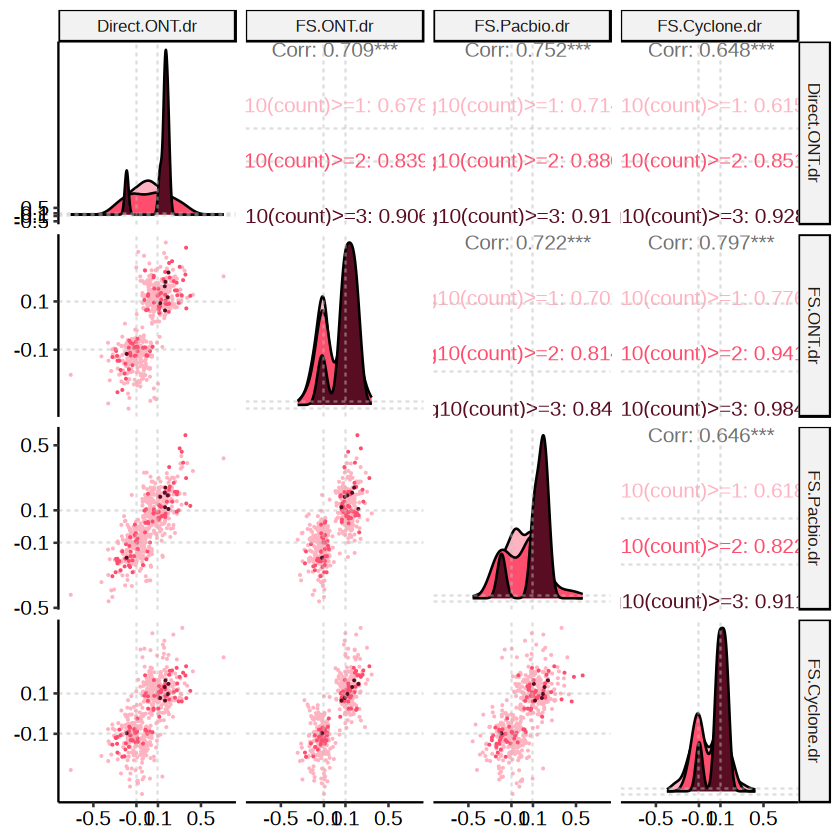

In [236]:
isocmpt$meancount = rowMeans(isocmpt[,c(4,6,8,10)])
isocmpt$countgroup = paste0("log10(count)>=", as.character(as.integer(log10(isocmpt$meancount))))
isocmpt = isocmpt[order(isocmpt$countgroup),]
p1.4 = ggpairs(isocmpt[isocmpt$countgroup != "log10(count)>=0",],columns = c(5,7,9,11),
        mapping = ggplot2::aes(colour = countgroup),
        upper = list(continuous = wrap("cor", method = "pearson")),
        lower = list(continuous = wrap("points",size = 0.01))) + 
        xlim(c(-0.75,0.75)) + ylim(c(-0.75,0.75)) + 
        scale_x_continuous(breaks = c(-0.5,-0.1,0.1,0.5)) +
        scale_y_continuous(breaks = c(-0.5,-0.1,0.1,0.5)) +
        geom_hline(yintercept = c(-0.1,0.1),linetype = 2,size = 0.5,color = "grey",alpha = 0.5) +
        geom_vline(xintercept = c(-0.1,0.1),linetype = 2,size = 0.5,color = "grey",alpha = 0.5) +
        theme_pubr() + scale_color_manual(values = c("#ffb3c1","#ff4d6d","#590d22")) +
        scale_fill_manual(values = c("#ffb3c1","#ff4d6d","#590d22"))
p1.4


In [238]:
ggexport(p1.4,filename = "result/figure_revision/technical_compare_DTU_dr_figure.pdf",width = 8,height = 7)
write.csv(isocmpt,file = "result/figure_revision/technical_compare_DTU_dr_total.csv",quote = FALSE,row.names = F)

file saved to result/figure_revision/technical_compare_DTU_dr_figure.pdf



### Calculate DTU within different celltypes

In [11]:
CalSigIsoform = function(transt){
  transt = transt[!is.na(transt$areatr),]
  transt = transt[transt$areatr != "",]
  transt$relative = transt$count/transt$genecount
 # transtf = transt[transt$count > 5,]
  transtf = transt[transt$genecount > 10,]
  transtf = transtf %>% group_by(transcript_id) %>% 
    mutate(meanrelative = mean(relative),
           otherrelative = (sum(relative) - relative)/(n() - 1))
  transtf = transtf[which(transtf$meanrelative > 0.05),]
  transtf = transtf %>% group_by(transcript_id) %>% 
    filter(length(unique(areatr))>1)
  transtf = transtf %>% group_by(gene_id) %>% 
    filter(length(unique(transcript_id))>1)
  
  # transtf$lfc = log2(transtf$relative/transtf$meanrelative)
  transtf$dr = transtf$relative - transtf$otherrelative
  transtf$sig = "N"
  table(transtf$sig)
  
  transtf$pvalue = 1
  MyChiqTest = function(transcript_id, areatr, count){
    dat = data.frame(transcript_id = transcript_id, areatr = areatr,
                     count = count)
    dat = dcast(dat, areatr~transcript_id,
                value.var = "count",
                fun.aggregate = sum)
    rownames(dat) = dat$areatr;dat = dat[-1]
    p = tryCatch(chisq.test(as.matrix(dat))$p.value, 
                 error = function(e) NA)
    return(p)
  }
    pvdf = transtf %>% group_by(gene_id) %>% summarise(pvalue = MyChiqTest(transcript_id, areatr, count))
    pvdf$padj = p.adjust(pvdf$pvalue,method = "BH")
    transtf = merge(transtf,pvdf,by = "gene_id")
    #print(head(transtf))
    # table(transtf[transtf$padj < 0.05,]$sig)
    #transtf[transtf$padj < 0.05,]$sig = "Y"
    transtf[which(transtf$dr > 0.1 & transtf$padj < 0.05 & transtf$count > 5), "sig"] = "Up"
    transtf[which(transtf$dr < -0.1 & transtf$padj < 0.05 & transtf$count > 5), "sig"] = "Down"
  return(transtf)
}

#cal celltype DTU 
{
  
  #NonNeuron vs Neuron
  # transtnn = transtls$class
  # transtnn = transtnn[transtnn$areatr %in% c("GLU","GABA","NonNeuron"),]
  # transtnn[transtnn$areatr %in% c("GLU","GABA"),]$areatr = "Neuron"
  # isosignn = CalSigIsoform(transtnn)
  # isosignnf = isosignn[isosignn$sig != "N",]
  # unique(isosignn[isosignn$sig != "N",]$gene_id)
  # table(isosignn$sig)
  #geneex = "CDC42"
  #grtdfl = BuildPlotBed(npclf,nanobed,"class",geneex,NULL)
  #p0c1 = IsoformReadPlot(gtfp, grtdfl, geneex,onlyhub = F)
  #p0c1
  #ggexport(p0c1,filename = "processed/figures/f3/bambu_cell_case_NNvsNeuron_CDC42.pdf",
   #        width = 6,height = 5)
  
  #NonNeuron vs GABA
  # transtng = transtls$class
  # transtng = transtng[transtng$areatr %in% c("GABA","NonNeuron"),]
  # isosigng = CalSigIsoform(transtng)
  # #unique(isosigngf[isosigngf$sig != "N",]$gene_id)
  
  # # #NonNeuron vs GLU
  # transtngu = transtls$class
  # transtngu = transtngu[transtngu$areatr %in% c("GLU","NonNeuron"),]
  # isosigngu = CalSigIsoform(transtngu)

  
  # #1. GLU and GABA
  # transtcl = transtls$class
  # transtcl = transtcl[transtcl$areatr %in% c("GLU","GABA"),]
  # isosigcl = CalSigIsoform(transtcl)
  #unique(isosigcl[isosigcl$sig != "N",]$gene_id)
  #table(isosigcl$sig)
  #npclfcl = npclf[npclf$class %in% c("GLU","GABA"),]
  #geneex = "MYL6"
  #grtdfl = BuildPlotBed(npclf,nanobed,"class",geneex,NULL)
  #p1c1 = IsoformReadPlot(gtfp, grtdfl, geneex,onlyhub = T)
  #p1c1
  #ggexport(p1c1,filename = "processed/figures/f3/bambu_cell_case_GLUvsGABA_MYL6.pdf",
  #         width = 6,height = 5)
  
  #2.within GABA
  transtclga = transtls$subclass
  transtclga = transtclga[transtclga$areatr %in% cellan[cellan$class %in% "GABA",]$subclass,]
  # unique(transtcls$areatr)
  # transtcls = transtcls[transtcls$areatr %in% c("GLU","GABA"),]
  isosigclga = CalSigIsoform(transtclga)
   #unique(isosigclgaf[isosigclgaf$sig != "N",]$gene_id)
  #unique(isosigclga[isosigclga$sig != "N",]$gene_id)
  
  #npclfclga = npclf[npclf$subclass %in% cellan[cellan$class %in% "GABA",]$subclass,]
  #geneex = "RPLP2"
  #grtdfl = BuildPlotBed(npclfclga,nanobed,"subclass",geneex,NULL)
  #p2c1 = IsoformReadPlot(gtfp, grtdfl, geneex,onlyhub = F)
  #p2c1
  #ggexport(p2c1,filename = "processed/figures/f3/bambu_cell_case_withinGABA_RPLP2.pdf",
  #         width = 6,height = 5)
  
  #3.within GLU
  transtcls = transtls$subclass
  transtcls = transtcls[transtcls$areatr %in% cellan[cellan$class %in% "GLU",]$subclass,]
  # unique(transtcls$areatr)
  # transtcls = transtcls[transtcls$areatr %in% c("GLU","GABA"),]
  isosigcls = CalSigIsoform(transtcls)
  # unique(isosigclsf[isosigclsf$sig != "N",]$gene_id)
  #unique(isosigcls[isosigcls$sig != "N",]$gene_id)
  
  #npclfcls = npclf[npclf$subclass %in% cellan[cellan$class %in% "GLU",]$subclass,]
  #geneex = "DDRGK1"
  #grtdfl = BuildPlotBed(npclfcls,nanobed,"subclass",geneex,NULL)
  #p3c1 = IsoformReadPlot(gtfp, grtdfl, geneex,onlyhub = T)
  #p3c1
  #ggexport(p3c1,filename = "processed/figures/f3/bambu_cell_case_withinGLU_DDRGK1.pdf",
  #         width = 6,height = 5)
  
  #3.within NonNeuron
  transtcln = transtls$subclass
  transtcln = transtcln[transtcln$areatr %in% cellan[cellan$class %in% "NonNeuron",]$subclass,]
  # unique(transtcls$areatr)
  # transtcls = transtcls[transtcls$areatr %in% c("GLU","GABA"),]
  isosigcln = CalSigIsoform(transtcln)
   #unique(isosigclnf[isosigclnf$sig != "N",]$gene_id)
  
  #npclfcln = npclf[npclf$subclass %in% cellan[cellan$class %in% "NonNeuron",]$subclass,]
  #geneex = "CIRBP"
  #grtdfl = BuildPlotBed(npclfcln,nanobed,"subclass",geneex,NULL)
  #p4c1 = IsoformReadPlot(gtfp, grtdfl, geneex,onlyhub = T)
  #p4c1
  #ggexport(p4c1,filename = "processed/figures/f3/bambu_cell_case_withinNN_CIRBP.pdf",
  #         width = 6,height = 5)
  
  # geneex = "NTM"
  # grtdfl = BuildPlotBed(npclfcln,nanobed,"subclass",geneex,NULL)
  # p4c2 = IsoformReadPlot(gtfp, grtdfl, geneex,onlyhub = T)
  # p4c2
  # ggexport(p4c1,filename = "processed/figures/f3/bambu_cell_case_withinNN_CIRBP.pdf",
  #          width = 6,height = 5)

  
  isosigls.cl = list(
      # "NonNeuron_GABA" = isosigng,
      #                "NonNeuron_GLU" = transtngu,
      #                "GLU_GABA" = isosigcl,
                     "GABA_GABA" = isosigclga,
                     "GLU_GLU" = isosigcls,
                     "NonNeuron_NonNeuron" = isosigcln)
  qsave(isosigls.cl,file = "data/dtu_analysis/dtu_isoform_ls_fsraw_dedup_celltype_24_09_17.qs")
  
  
  #stat
  sigenenst = NULL
  for (i in 1:length(isosigls.cl)) {
    gn = length(unique(isosigls.cl[[i]][isosigls.cl[[i]]$sig!="N",]$gene_id))
      print(gn)
    sigenenst = rbind(sigenenst,data.frame("group" = names(isosigls.cl)[i],
                                           "genenumber" = gn))
  }
  # sigenenst$Var1 = MySplit(sigenenst$group,"_",1)
  # sigenenst$Var2 = MySplit(sigenenst$group,"_",2)
  # ps1 = ggplot(sigenenst,aes(x = Var2, y = Var1, fill = genenumber)) + 
  #   geom_tile() + 
  #   geom_text(aes(label = genenumber),color = "black") + 
  #   theme_pubr() + coord_fixed() +
  #   scale_fill_viridis(option = "D") + xlab("") + ylab("")
  # ps1
  # ggexport(ps1,
  #          filename = "result/figure3/bambu_cell_sig_isoform_st_24_04_30.pdf",
  #          width = 5,height = 4)
  
  
}

Warning message:
"There were 3767 warnings in `summarise()`.
The first warning was:
ℹ In argument: `pvalue = MyChiqTest(transcript_id, areatr, count)`.
ℹ In group 1: `gene_id = "AAAS"`.
Caused by warning in `chisq.test()`:
! Chi-squared approximation may be incorrect
ℹ Run `dplyr::last_dplyr_warnings()` to see the 3766 remaining warnings."
Warning message:
"There were 5639 warnings in `summarise()`.
The first warning was:
ℹ In argument: `pvalue = MyChiqTest(transcript_id, areatr, count)`.
ℹ In group 1: `gene_id = "AAAS"`.
Caused by warning in `chisq.test()`:
! Chi-squared approximation may be incorrect
ℹ Run `dplyr::last_dplyr_warnings()` to see the 5638 remaining warnings."
Warning message:
"There were 3400 warnings in `summarise()`.
The first warning was:
ℹ In argument: `pvalue = MyChiqTest(transcript_id, areatr, count)`.
ℹ In group 1: `gene_id = "AAAS"`.
Caused by warning in `chisq.test()`:
! Chi-squared approximation may be incorrect
ℹ Run `dplyr::last_dplyr_warnings()` to see the 

[1] 248
[1] 1066
[1] 259


In [12]:
for (i in 1:length(isosigls.cl)) {
    isosigls.cl[[i]] = isosigls.cl[[i]][isosigls.cl[[i]]$gene_id %in% unique(gtfinfo$GENEID),]
}
  qsave(isosigls.cl,file = "data/dtu_analysis/dtu_isoform_ls_fsraw_dedup_celltype_24_09_17.qs")

ERROR: Error in h(simpleError(msg, call)): error in evaluating the argument 'table' in selecting a method for function '%in%': error in evaluating the argument 'x' in selecting a method for function 'unique': object 'gtfinfo' not found


In [308]:
#calculate ASC from different layer
fs.info.cortex$areatr = paste0(fs.info.cortex$layer,"-",fs.info.cortex$subclass)
transtls$sublayer = FullLengthTranSt(fs.info.cortex[fs.info.cortex$subclass == "PVALB",])
transtnn = transtls$sublayer
#transtnn = transtnn[transtnn$areatr %in% paste0("l",1:6,"-ASC"),]
isosignn = CalSigIsoform(transtnn)
unique(isosignn[isosignn$sig != "N",]$gene_id)

`summarise()` has grouped output by 'gene_id', 'transcript_id'. You can
override using the `.groups` argument.
Warning message:
"There were 3077 warnings in `summarise()`.
The first warning was:
ℹ In argument: `pvalue = MyChiqTest(transcript_id, areatr, count)`.
ℹ In group 1: `gene_id = "AAK1"`.
Caused by warning in `chisq.test()`:
! Chi-squared approximation may be incorrect
ℹ Run `dplyr::last_dplyr_warnings()` to see the 3076 remaining warnings."


[1] "BambuGene11813" "BNIP3L"         "CHN1"           "CLNS1A"        
 [5] "EPB41L3"        "LOC102119634"   "MRPL52"         "PAK1"          
 [9] "PBRM1"          "PSMG4"          "RAD23B"         "RPL31"         
[13] "RPS20"          "SGIP1"          "SPRYD3"         "ST3GAL1"       
[17] "VDAC3"          "YDJC"

In [311]:
isosignn[isosignn$sig != "N",]

,gene_id,transcript_id,areatr,count,genecount,relative,meanrelative,otherrelative,dr,sig,pvalue.x,pvalue.y,padj
,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
2411,BambuGene11813,BambuGene11813-WeiLab-3,l3-PVALB,74,80,0.92500000,0.73182283,0.667430446,0.2575696,Up,1,1.729356e-04,3.206429e-02
2412,BambuGene11813,BambuGene11813-WeiLab-3,l4-PVALB,14,27,0.51851852,0.73182283,0.802924273,-0.2844058,Down,1,1.729356e-04,3.206429e-02
2416,BambuGene11813,BambuGene11813-WeiLab-4,l4-PVALB,9,27,0.33333333,0.17621493,0.123842123,0.2094912,Up,1,1.729356e-04,3.206429e-02
2998,BNIP3L,NM_001283691.1,l3-PVALB,11,102,0.10784314,0.22977651,0.260259857,-0.1524167,Down,1,1.610962e-04,3.173596e-02
2999,BNIP3L,NM_001283691.1,l4-PVALB,27,62,0.43548387,0.22977651,0.178349673,0.2571342,Up,1,1.610962e-04,3.173596e-02
3007,BNIP3L,XM_015454368.1,l3-PVALB,86,102,0.84313725,0.72929053,0.700828853,0.1423084,Up,1,1.610962e-04,3.173596e-02
3008,BNIP3L,XM_015454368.1,l4-PVALB,30,62,0.48387097,0.72929053,0.790645425,-0.3067745,Down,1,1.610962e-04,3.173596e-02
3010,BNIP3L,XM_015454368.1,l6-PVALB,25,30,0.83333333,0.72929053,0.703279833,0.1300535,Up,1,1.610962e-04,3.173596e-02
4995,CHN1,CHN1-WeiLab-1,l1-PVALB,9,14,0.64285714,0.13112311,0.028776306,0.6140808,Up,1,7.627526e-27,2.404196e-23


In [326]:
#calculate ASC from different layer
fs.info.cortex$areatr = fs.info.cortex$lobe
transtls$sublobe = FullLengthTranSt(fs.info.cortex[fs.info.cortex$class %in% c("GABA"),])
#transtnn = transtnn[transtnn$areatr %in% paste0("l",1:6,"-ASC"),]
isosignn2 = CalSigIsoform(transtls$sublobe)
unique(isosignn2[isosignn2$sig != "N",]$gene_id)

`summarise()` has grouped output by 'gene_id', 'transcript_id'. You can
override using the `.groups` argument.
Warning message:
"There were 5528 warnings in `summarise()`.
The first warning was:
ℹ In argument: `pvalue = MyChiqTest(transcript_id, areatr, count)`.
ℹ In group 1: `gene_id = "AAAS"`.
Caused by warning in `chisq.test()`:
! Chi-squared approximation may be incorrect
ℹ Run `dplyr::last_dplyr_warnings()` to see the 5527 remaining warnings."


[1] "ADARB2"          "APC"             "APOD"            "BambuGene100931"
 [5] "BLOC1S2"         "CALB1"           "CD300LG"         "CDKN2AIPNL"     
 [9] "CHURC1"          "CPEB4"           "DNAJC15"         "DYNC2LI1"       
[13] "ERGIC3"          "FAM222B"         "FRMD4A"          "FRY"            
[17] "GOT1"            "GRAMD1B"         "KHDRBS2"         "KIFAP3"         
[21] "LDOC1"           "LMBRD1"          "LOC102127351"    "MAP2K7"         
[25] "MAPRE1"          "NFE2L2"          "NPAS3"           "NTRK2"          
[29] "OSBPL9"          "PDRG1"           "PPIP5K2"         "PSMA2_1"        
[33] "RAD23B"          "RPS10"           "SEPT2"           "SETBP1"         
[37] "SNRNP35"         "SORBS2"          "TPM4"            "ZCCHC14"

In [329]:
isosignn2[isosignn2$sig != "N" & isosignn2$areatr %in% c("somatosensory","auditory") & isosignn2$count > 50,]
isosignn2[isosignn2$gene_id == "KIFAP3",]

,gene_id,transcript_id,areatr,count,genecount,relative,meanrelative,otherrelative,dr,sig,pvalue.x,pvalue.y,padj
,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
24257,GOT1,NM_001284930.1,somatosensory,52,155,0.3354839,0.2381110,0.2186364,0.1168474,Up,1,2.017868e-04,0.0309923871
24259,GOT1,XM_015455846.1,auditory,75,88,0.8522727,0.7618890,0.7438122,0.1084605,Up,1,2.017868e-04,0.0309923871
24263,GOT1,XM_015455846.1,somatosensory,103,155,0.6645161,0.7618890,0.7813636,-0.1168474,Down,1,2.017868e-04,0.0309923871
29549,KIFAP3,XM_005539957.2,auditory,77,121,0.6363636,0.7778009,0.8060884,-0.1697247,Down,1,3.212362e-04,0.0447489561
29553,KIFAP3,XM_005539957.2,somatosensory,71,81,0.8765432,0.7778009,0.7580524,0.1184908,Up,1,3.212362e-04,0.0447489561
32387,LOC102127351,XR_001488860.1,auditory,107,145,0.7379310,0.8728849,0.8998757,-0.1619447,Down,1,4.277212e-07,0.0003660072


,gene_id,transcript_id,areatr,count,genecount,relative,meanrelative,otherrelative,dr,sig,pvalue.x,pvalue.y,padj
,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
29543,KIFAP3,XM_005539956.2,auditory,40,121,0.3305785,0.2085566,0.1841523,0.14642625,Up,1,0.0003212362,0.04474896
29544,KIFAP3,XM_005539956.2,cingulate,22,127,0.1732283,0.2085566,0.2156223,-0.04239395,N,1,0.0003212362,0.04474896
29545,KIFAP3,XM_005539956.2,occipital,22,117,0.1880342,0.2085566,0.2126611,-0.02462694,N,1,0.0003212362,0.04474896
29546,KIFAP3,XM_005539956.2,parietal,64,246,0.2601626,0.2085566,0.1982354,0.06192715,N,1,0.0003212362,0.04474896
29547,KIFAP3,XM_005539956.2,somatosensory,10,81,0.1234568,0.2085566,0.2255766,-0.10211982,Down,1,0.0003212362,0.04474896
29548,KIFAP3,XM_005539956.2,temporal,70,398,0.1758794,0.2085566,0.2150921,-0.03921269,N,1,0.0003212362,0.04474896
29549,KIFAP3,XM_005539957.2,auditory,77,121,0.6363636,0.7778009,0.8060884,-0.16972472,Down,1,0.0003212362,0.04474896
29550,KIFAP3,XM_005539957.2,cingulate,102,127,0.8031496,0.7778009,0.7727312,0.03041845,N,1,0.0003212362,0.04474896
29551,KIFAP3,XM_005539957.2,occipital,94,117,0.8034188,0.7778009,0.7726773,0.03074148,N,1,0.0003212362,0.04474896


[1] 236
[1] 109


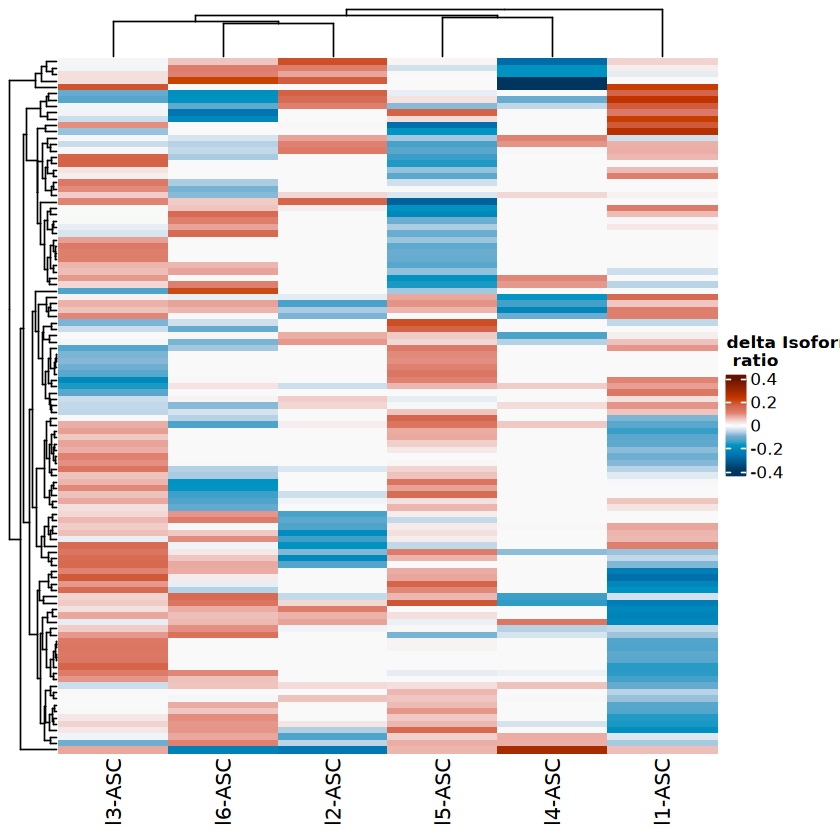

In [30]:
isosigi = isosignn
hubtrans = unique(isosigi[isosigi$sig != "N",]$transcript_id)
isosigf2 = isosigi[isosigi$transcript_id %in% hubtrans,]
isosigf2$dr2 = isosigf2$relative - isosigf2$meanrelative
print(length(unique(isosigf2$transcript_id)))
    #isosigf2 = isosigc[isosigc$transcript_id %in% isosigf2$transcript_id,]
isosigf2 = isosigf2 %>% group_by(transcript_id) %>% filter(max(abs(dr2)) > 0.05)
isosigf2 = isosigf2 %>% group_by(gene_id) %>% filter(meanrelative == max(meanrelative))
    #length(unique(isosigf2$transcript_id))
print(length(unique(isosigf2$gene_id)))
isosigf.mx1 = dcast(isosigf2,transcript_id~areatr,value.var = "dr2",fun.aggregate = sum)
rownames(isosigf.mx1) = isosigf.mx1$transcript_id;isosigf.mx1 = isosigf.mx1[-1]

library(circlize)
col_fun = colorRamp2(c(-0.4,-0.1, 0,0.1, 0.4), hcl_palette = "RdBu",reverse = T)
isosigf.mx1 = as.matrix(isosigf.mx1)
library(ComplexHeatmap)
pcloneht1 = Heatmap(isosigf.mx1,show_row_names = F,name = "delta Isoform\n ratio",col = col_fun)
pcloneht1

In [31]:
unique(isosigf2$gene_id)

[1] "ABHD2"        "ACYP2"        "ANK2"         "ANXA6"        "APBA2"       
  [6] "APC2"         "ARHGAP21"     "ARL6IP4"      "ARPP21"       "ATP6V0C"     
 [11] "AURKAIP1"     "BAZ2B"        "BSG"          "C1H1orf35"    "CALD1"       
 [16] "CAMKV"        "CDK5R1"       "CHPT1"        "CHTOP"        "CLTB"        
 [21] "COPRS"        "COPS8"        "DCLK1"        "DCTN2"        "DDRGK1"      
 [26] "DICER1"       "DIRAS2"       "DPY30"        "EEF1B2"       "ESRRG"       
 [31] "EXOC7"        "FAM162A"      "FBXW7"        "FUOM"         "G3BP2"       
 [36] "GAP43"        "GLS"          "GNB1"         "GNPTG"        "GPX4"        
 [41] "GRIN1"        "GSK3B"        "IDH3B"        "KCNMA1"       "KIFAP3"      
 [46] "KMT2A"        "LAMP2"        "LMBRD1"       "LOC101925321" "LOC102115161"
 [51] "LOC102132250" "LOC102133057" "LOC102135073" "LOC102141554" "LOC107130043"
 [56] "LOC107131073" "LSAMP"        "MADD"         "MEA1"         "MRPL14"      
 [61] "MRPL51"       "MRPL52"       "NCAPD3"       "NKX6-2"       "OBSL1"       
 [66] "OLFM2"        "PAQR8"        "PCNX2"        "PFKM"         "PHF24"       
 [71] "PPM1B"        "PPP1CC"       "PPP2R2B"      "PPP3CB"       "PPP6R2"      
 [76] "PRMT1"        "PSIP1"        "PTGES3"       "PTK2B"        "PTMA"        
 [81] "RAB18"        "RAPGEF3"      "RGL1"         "RNF157"       "RNPC3"       
 [86] "RPL26L1"      "RPL5"         "RPS10"        "RTN4"         "SDCCAG8"     
 [91] "SEPT4"        "SERBP1"       "SNRPN"        "SPG7"         "SPOCK1"      
 [96] "SRRM2"        "ST6GALNAC6"   "STAU2"        "STOML2"       "SYNGR1"      
[101] "TCAF1"        "TCEAL4"       "TEX2"         "TMEM248"      "TRIM37"      
[106] "TUBB2B"       "UBAP2L"       "YBX1"         "ZNF451"

### Bed file mad

In [6]:
read.totalan =  qread("data/reads_full_anotation/read_total_annotation_nobackground_24_08_22.qs")

In [7]:
# longbedt = qread("ref/long_read_mapping_total_rawnano_pac2_fil_24_03_29.qs")
longbed = import("/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/cyclone_revo_process/bedfile/TB2000_total.bed", format = "BED")
# qsave(longbed,"ref/long_read_mapping_total_rawnano_pac2_24_03_29.qs")
length(longbed)
longbed = longbed[longbed$name %in% read.totalan$readid,]
length(longbed)
qsave(longbed,"ref/long_read_mapping_total_rawnano_cyclon_fil_24_11_12.qs")
# longbedt = rbind(longbedt,longbed)
longbed = import("/cluster/home/liuhengxin/P1_brain_nanopore/processed_data/nano_revo_process/bedfile/ONT_BV827-001N0001_clean.part_total.bed", format = "BED")
longbed = longbed[longbed$name %in% read.totalan$readid,]
length(longbed)
qsave(longbed,"ref/long_read_mapping_total_rawnano_nano_fil_24_11_12.qs")


[1] 507385529

[1] 63320085

[1] 102777086

In [8]:
longbedt = qread("ref/long_read_mapping_total_rawnano_pac2_fil_24_03_29.qs")
longbed = qread("ref/long_read_mapping_total_rawnano_cyclon_fil_24_11_12.qs")
length(longbedt)
longbedt = c(longbedt,longbed)
length(longbedt)
longbed = qread("ref/long_read_mapping_total_rawnano_nano_fil_24_11_12.qs")
longbedt = c(longbedt,longbed)
length(longbedt)

qsave(longbedt,"ref/long_read_mapping_total_rawnano_total_fil_24_11_12.qs")

[1] 111454696

Warning message in .merge_two_Seqinfo_objects(x, y):
"Each of the 2 combined objects has sequence levels not in the other:
  - in 'x': NW_005093143.1, NW_005093152.1, NW_005093217.1, NW_005093282.1, NW_005093504.1, NW_005093514.1, NW_005093552.1, NW_005093576.1, NW_005093578.1, NW_005093585.1, NW_005093663.1, NW_005093699.1, NW_005093711.1, NW_005093835.1, NW_005093863.1, NW_005093973.1, NW_005094008.1, NW_005094094.1, NW_005094193.1, NW_005094209.1, NW_005094440.1, NW_005094475.1, NW_005094575.1, NW_005094642.1, NW_005094794.1, NW_005094848.1, NW_005095027.1, NW_005095064.1, NW_005095095.1, NW_005095432.1, NW_005095435.1, NW_005095867.1, NW_005095888.1, NW_005096108.1, NW_005096139.1, NW_005096186.1, NW_005096267.1, NW_005096289.1, NW_005096305.1, NW_005096449.1, NW_005096495.1, NW_005096563.1, NW_005096666.1, NW_005096700.1, NW_005096712.1, NW_005096742.1, NW_005096769.1, NW_005096823.1, NW_005096894.1, NW_005096929.1, NW_005096936.1, NW_005097029.1, NW_005097058.1, NW_005097109.1, N

[1] 174774781

Warning message in .merge_two_Seqinfo_objects(x, y):
"Each of the 2 combined objects has sequence levels not in the other:
  - in 'x': NW_005093086.1, NW_005093143.1, NW_005093152.1, NW_005093418.1, NW_005093514.1, NW_005093539.1, NW_005093552.1, NW_005093576.1, NW_005093578.1, NW_005093585.1, NW_005093663.1, NW_005093699.1, NW_005093835.1, NW_005093863.1, NW_005093973.1, NW_005094008.1, NW_005094094.1, NW_005094193.1, NW_005094209.1, NW_005094440.1, NW_005094575.1, NW_005094679.1, NW_005094794.1, NW_005094848.1, NW_005095432.1, NW_005095435.1, NW_005095669.1, NW_005095867.1, NW_005096139.1, NW_005096186.1, NW_005096267.1, NW_005096289.1, NW_005096305.1, NW_005096478.1, NW_005096548.1, NW_005096700.1, NW_005096712.1, NW_005096742.1, NW_005096769.1, NW_005096875.1, NW_005096894.1, NW_005096991.1, NW_005097343.1, NW_005097403.1, NW_005097432.1, NW_005097505.1, NW_005097551.1, NW_005097555.1, NW_005097624.1, NW_005097693.1, NW_005097779.1, NW_005097793.1, NW_005097800.1, NW_005097857.1, N

[1] 277551867

## Case list plot

In [17]:
#case plot
library(randomcoloR)
BuildPlotBed = function(npclf,nanobed,groupname,geneex,sigtr = NULL){
    readgroup = npclf[npclf$gene_id == geneex,]
    # readgroup = readgroup[readgroup$arealayer %in% paste0("l",1:6),]
    readgroup = unique(readgroup[c("readid","transcript_id","gene_id",
                                   groupname)])
    # readgroup = readgroup %>% group_by(readid) %>% 
    #   mutate(transgroup = 
    #            paste(unique(transcript_id)[order(unique(transcript_id))],
    #                              collapse = "|"))
    readgrt = nanobed[nanobed$name %in% readgroup$readid,]
    readgrt$group = readgroup[match(readgrt$name,
                                    readgroup$readid),
                              groupname]
    # readgrt$transcript_id = readgroup[match(readgrt$name,readgroup$readid),
    #                                   "transcript_id"]
    # readgrt$transgroup = readgroup[match(readgrt$name,readgroup$readid),
    #                                   "transgroup"]
    
    grtdfl = as.data.frame(readgrt)
    colnames(grtdfl)[ncol(grtdfl)] = "group"
    colnames(grtdfl)[6] = "readid"
    grtdfl = merge(grtdfl,readgroup[c("readid",
                              "transcript_id")],
          by = "readid")
    grtdfl = grtdfl[order(grtdfl$transcript_id,
                          grtdfl$start,grtdfl$end),]
    grtdfl = grtdfl[!is.na(grtdfl$group) &
                      grtdfl$group != "",]
    grtdfl
    grtdfl$readord = paste0(grtdfl$transcript_id,"-",grtdfl$readid)
    grtdfl = grtdfl %>% group_by(group) %>% 
      mutate(orid = as.numeric(factor(readord,
                                      levels = unique(readord)))) %>%
      mutate(oridnorm = orid/max(orid))
    grtdfl$sig = "black"
    grtdfl[grtdfl$group %in% sigtr, "sig"] = "red"
    return(grtdfl)
}

IsoformReadPlot = function(gtfp, grtdfl, geneex, onlyhub = T,mycolor = NULL){
    library(randomcoloR)
    library(ggbio)
    library(ggtranscript)
    tartrans = gtfp[which(gtfp$gene_id == geneex),]
    tartrans = as.data.frame(tartrans)
    tartrans = tartrans[tartrans$type == "exon",]
    tartrans = tartrans[order(tartrans$transcript_id),]
    tartrans$orid = as.numeric(factor(tartrans$transcript_id,levels = unique(tartrans$transcript_id)))
    tartrans$group = NA
    if(onlyhub){
      grtdfl = grtdfl %>% group_by(readid) %>% filter(length(unique(transcript_id)) == 1)
      grtdfl$readord = paste0(grtdfl$transcript_id,"-",grtdfl$readid)
      grtdfl = grtdfl %>% group_by(group) %>% 
        mutate(orid = as.numeric(factor(readord,
                                        levels = unique(readord)))) %>%
        mutate(oridnorm = orid/max(orid))
      tartrans = tartrans[tartrans$transcript_id %in% grtdfl$transcript_id,]
    }
    # tartrans = merge(tartrans,unique(grtdfl[c("transcript_id",
    #                                           "transgroup")]),
    #                  by = "transcript_id")
    tartranstx = tartrans %>% group_by(transcript_id,orid) %>% 
      summarise(start = min(start),end = max(end))
    tartranstx$group = NA
    mylim = c(min(tartranstx$start)-1000,max(tartranstx$end)+1000)
    library(ggh4x)
    
    #facetcol = list()
    #facetcoldf = unique(grtdfl[c("group","sig")])
    #facetcoldf = facetcoldf[order(facetcoldf$group,decreasing = F),]
    #for (i in 1:nrow(facetcoldf)) {
    #  facetcol[[i]] = element_text(color = facetcoldf[i,]$sig)
    #}
    #facetcol[[nrow(facetcoldf)+1]] = element_text(color = "black")
    grtdflin = to_intron(grtdfl,
                     "readord")
    no_of_colors = length(unique(grtdfl$transcript_id)) 
    colorful_palette = distinctColorPalette(no_of_colors) 
    names(colorful_palette) = unique(grtdfl$transcript_id)
    if(!is.null(mycolor)){
        colorful_palette = mycolor
    }

    
    pc = ggplot(grtdfl,aes(x = start,xend = end,
                      y = orid,
                      yend = orid,
                      fill = transcript_id,color = transcript_id)) +
      geom_segment(size = 0.5) +
      geom_segment(data = grtdflin,
                   aes(x = start,xend = end,
                       y = orid,
                       yend = orid),
                   size = 0.03,alpha = 0.5,color = "grey") +
      geom_range(data = tartrans,
                 aes(xstart = start,xend = end,
                     y = orid,
                     fill = transcript_id,color = transcript_id),
                 size = 0.2) +
      geom_intron(data = to_intron(tartrans,
                                   "transcript_id"),
                  aes(xstart = start,xend = end,strand = strand),
                  size = 0.2,
                  arrow.min.intron.length = 200,
                  arrow = arrow(length=unit(0.3,"cm"))) +
      geom_text(data = tartranstx,
                aes(x = (start + end) / 2,y = orid,
                    label = transcript_id),
                size = 3, vjust = -0.1, color = "black") +
     # facet_grid2(group~.,scales = "free",
     #             strip = strip_themed(
     #               text_y = facetcol
    #            )) +
      facet_wrap(group~.,scales = "free",ncol = 1,strip.position = "top") +
      scale_x_continuous(limits = mylim)+
      scale_color_manual(values = colorful_palette) +
      scale_fill_manual(values = colorful_palette) +
      # scale_fill_discreterainbow() +
      theme_void() + 
      ggtitle(geneex) +
      theme(legend.position = "none",
            panel.spacing = unit(0,'lines'),
            strip.background = element_rect(fill = NA,color = NA),
           strip.placement = "outside",
           plot.title = element_text(hjust = 0.5))
    pc
    
    return(pc)
}
#fsraw.cor = fsraw[fsraw$layer %in% paste0("l",1:6),]
#
IsoformReadPlotTotal = function(fsraw,isosigi,longbed,gtf,geneex,hubtrans = NULL){
    transname = unique(isosigi[isosigi$gene_id %in% geneex,]$transcript_id)
    if(!is.null(hubtrans)){
        transname = hubtrans
    }
    mycolors = distinctColorPalette(length(transname))
    names(mycolors) = transname
    grtdfl = BuildPlotBed(fsraw,longbed,'areatr',geneex,NULL)
    grtdfl = grtdfl[grtdfl$transcript_id %in% transname,]
    
    pci1 = IsoformReadPlot(gtf, grtdfl, geneex,onlyhub = F,mycolors)
    pci1
    return(pci1)
}

In [7]:
fsraw.cor = qread("data/reads_full_anotation/main_data_read_total_annotation_delete_multiread_24_08_22.qs")
isosigls = qread(file = "data/dtu_analysis/dtu_isoform_ls_fsrawcor_24_08_22.qs")
longbed = qread("ref/long_read_mapping_total_rawnano_total_fil_24_04_20.qs")

In [8]:
fsraw.cor = fsraw.cor[fsraw.cor$layer %in% paste0("l",1:6),]

In [ ]:
#layer
isosigi = isosigls$layer
isosighub = isosigi[isosigi$sig != "N" & isosigi$sig != "Y" & isosigi$count > 50,]
gmksi = unique(isosighub$gene_id)
length(gmksi)
pcls.layer = list()
for(i in 1:length(gmksi)){
    print(i)
    fsraw.cor$areatr = fsraw.cor$layer
    fsraw.cor$chunk = fsraw.cor$lobe
    pcls.layer[[i]] = tryCatch(IsoformReadPlotTotal(fsraw.cor,isosigi,longbed,gtf,gmksi[i],NULL),
                               error = function(e) NULL)
                               
}
  # ggexport(parcl_casels

pdf("result/figure2/dtu_case_ls_layer_24_09_04.pdf",
           width = 10,height = 8)
for(i in 1:length(pcls.layer)){
     tryCatch(print(pcls.layer[[i]]), error = function(e) NULL)
}
dev.off()

[1] 527

[1] 1


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 2


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 3


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 4


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 5


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 6


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 7


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


In [22]:
#lobe
isosigi = isosigls$lobe
isosighub = isosigi[isosigi$sig != "N" & isosigi$sig != "Y" & isosigi$count > 50,]
gmksi = unique(isosighub$gene_id)
length(gmksi)
pcls.lobe = list()
for(i in 1:length(gmksi)){
    print(i)
    fsraw.cor$areatr = fsraw.cor$lobe
    fsraw.cor$chunk = fsraw.cor$layer
    pcls.lobe[[i]] = tryCatch(IsoformReadPlotTotal(fsraw.cor,isosigi,longbed,gtf,gmksi[i],NULL),
                               error = function(e) NULL)
                               
}

pdf("result/figure2/dtu_case_ls_lobe_24_09_04.pdf",width = 10,height = 8)
for(i in 1:length(pcls.lobe)){
     tryCatch(print(pcls.lobe[[i]]), error = function(e) NULL)
}
dev.off()

[1] 440

[1] 1


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 2


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 3


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 4


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 5


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 6


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 7


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 8


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 9


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 10


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 11


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 12


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 13


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 14


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 15


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 16


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 17


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 18


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 19


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 20


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 21


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 22


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 23


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 24


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 25


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 26


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 27


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 28


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 29


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 30


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 31


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 32


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 33


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 34


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 35


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 36


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 37


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 38


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 39


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 40


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 41


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 42


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 43


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 44


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 45


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 46


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 47


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 48


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 49


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 50


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 51


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 52


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 53


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 54


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 55


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 56


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 57


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 58


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 59


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 60


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 61


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 62


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 63


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 64


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 65


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 66


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 67


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 68


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 69


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 70


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 71


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 72


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 73


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 74


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 75


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 76


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 77


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 78


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 79


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 80


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 81


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 82


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 83


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 84


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 85


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 86


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 87


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 88


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 89


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 90


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 91


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 92


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 93


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 94


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 95


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 96


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 97


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 98


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 99


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 100


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 101


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 102


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 103


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 104


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 105


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 106


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 107


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 108


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 109


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 110


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 111


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 112


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 113


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 114


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 115


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 116


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 117


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 118


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 119


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 120


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 121


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 122


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 123


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 124


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 125


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 126


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 127


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 128


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 129


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 130


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 131


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 132


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 133


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 134


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 135


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 136


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 137


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 138


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 139


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 140


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 141


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 142


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 143


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 144


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 145


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 146


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 147


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 148


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 149


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 150


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 151


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 152


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 153


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 154


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 155


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 156


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 157


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 158


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 159


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 160


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 161


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 162


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 163


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 164


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 165


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 166


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 167


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 168


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 169


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 170


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 171


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 172


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 173


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 174


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 175


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 176


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 177


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 178


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 179


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 180


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 181


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 182


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 183


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 184


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 185


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 186


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 187


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 188


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 189


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 190


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 191


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 192


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 193


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 194


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 195


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 196


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 197


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 198


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 199


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 200


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 201


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 202


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 203


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 204


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 205


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 206


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 207


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 208


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 209


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 210


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 211


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 212


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 213


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 214


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 215


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 216


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 217


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 218


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 219


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 220


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 221


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 222


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 223


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 224


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 225


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 226


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 227


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 228


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 229


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 230


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 231


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 232


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 233


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 234


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 235


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 236


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 237


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 238


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 239


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 240


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 241


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 242


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 243


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 244


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 245


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 246


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 247


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 248


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 249


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 250


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 251


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 252


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 253


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 254


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 255


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 256


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 257


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 258


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 259


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 260


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 261


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 262


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 263


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 264


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 265


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 266


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 267


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 268


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 269


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 270


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 271


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 272


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 273


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 274


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 275


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 276


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 277


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 278


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 279


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 280


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 281


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 282


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 283


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 284


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 285


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 286


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 287


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 288


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 289


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 290


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 291


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 292


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 293


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 294


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 295


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 296


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 297


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 298


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 299


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 300


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 301


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 302


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 303


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 304


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 305


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 306


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 307


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 308


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 309


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 310


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 311


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 312


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 313


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 314


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 315


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 316


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 317


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 318


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 319


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 320


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 321


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 322


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 323


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 324


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 325


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 326


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 327


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 328


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 329


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 330


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 331


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 332


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 333


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 334


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 335


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 336


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 337


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 338


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 339


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 340


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 341


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 342


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 343


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 344


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 345


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 346


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 347


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 348


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 349


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 350


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 351


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 352


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 353


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 354


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 355


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 356


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 357


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 358


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 359


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 360


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 361


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 362


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 363


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 364


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 365


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 366


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 367


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 368


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 369


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 370


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 371


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 372


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 373


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 374


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 375


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 376


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 377


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 378


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 379


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 380


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 381


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 382


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 383


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 384


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 385


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 386


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 387


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 388


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 389


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 390


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 391


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 392


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 393


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 394


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 395


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 396


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 397


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 398


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 399


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 400


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 401


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 402


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 403


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 404


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 405


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 406


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 407


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 408


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 409


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 410


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 411


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 412


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 413


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 414


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 415


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 416


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 417


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 418


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 419


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 420


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 421


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 422


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 423


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 424


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 425


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 426


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 427


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 428


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 429


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 430


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 431


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 432


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 433


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 434


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 435


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 436


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 437


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 438


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 439


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.


[1] 440


`summarise()` has grouped output by 'transcript_id'. You can override using the
`.groups` argument.
Warning message:
"Removed 6 rows containing missing values or values outside the scale range
(`geom_segment()`)."
Warning message:
"Removed 4 rows containing missing values or values outside the scale range
(`geom_segment()`)."
Warning message:
"Removed 1 row containing missing values or values outside the scale range
(`geom_segment()`)."
Warning message:
"Removed 1 row containing missing values or values outside the scale range
(`geom_segment()`)."
Warning message:
"Removed 22 rows containing missing values or values outside the scale range
(`geom_segment()`)."
Warning message:
"Removed 16 rows containing missing values or values outside the scale range
(`geom_segment()`)."
Warning message:
"Removed 1 row containing missing values or values outside the scale range
(`geom_segment()`)."
Warning message:
"Removed 2 rows containing missing values or values outside the scale range
(`geom_seg

png 
  2